## KMeans with different k: Test with crossing data
KMeans normal bins and running bins

In [1]:
import cluster_data_mag
from cluster_data_mag import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
from kmeans import k_means
from cluster_plotter import ClusterPlotter
from clustering_utils_mag import ClusterData
import cluster_plotter

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_mag.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data_mag.bin_data_for_clustering(running_ranges, print_res=False)

k_values = [3, 4, 5, 6, 7]

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images\k_means_tests_running_bins_mag"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning K-Means for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.mag]).T
    feature_names = ["inclination [°]", "RAAN [°]", "Magnitude [mag]"]


    normalized_data, data_min, data_max = normalize_data(data_array)

    k_values = [3, 4, 5, 6, 7]

    results = []

    for k in k_values:
        result_kmeans, time_kmeans, n_clusters_kmeans, points_per_cluster_kmeans, metrics_kmeans = run_clustering(
            k_means, f"K-means (k={k})", normalized_data, data_min, data_max, k, plot=False, init='kmeans++'
        )

        unnormalized_data, cluster_centers = unnormalize(
            result_kmeans.data, result_kmeans.cluster_centers, data_min, data_max
        )
        plotter = ClusterPlotter(unnormalized_data, result_kmeans.labels, cluster_centers)
        plot_filename = os.path.join(plot_dir, f"kmeans_{year_range}_k{k}.png")
        title = f"k-Means: years = {year_range}, k = {k}"
        plotter.clusters_3d_plot(title, plot_filename, feature_names=feature_names)

        # Round metric results
        rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_kmeans[4].items()}
        #rounded_square_density = {key: round(value, 3) for key, value in metrics_kmeans[5].items()}
        #rounded_hull_density = {key: round(value, 3) for key, value in metrics_kmeans[6].items()}

        results.append({
            "Year Range": year_range,
            "k": k,
            "Runtime (s)": f"{time_kmeans:.3f}",
            "Clusters": n_clusters_kmeans,
            "Points per Cluster": points_per_cluster_kmeans,
            "Davies-Bouldin": f"{metrics_kmeans[0]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[0], (int, float)) else None,
            "Calinski-Harabasz": f"{metrics_kmeans[1]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[1], (int, float)) else None,
            "Dunn Index": f"{metrics_kmeans[2]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[2], (int, float)) else None,
            "Silhouette Score": f"{metrics_kmeans[3]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[3], (int, float)) else None,
            "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None 
        })

    df = pd.DataFrame(results)
    display(df)
    print(binned_data)

<>:25: SyntaxWarning: invalid escape sequence '\k'
<>:25: SyntaxWarning: invalid escape sequence '\k'
C:\Users\fionu\AppData\Local\Temp\ipykernel_54260\3065664169.py:25: SyntaxWarning: invalid escape sequence '\k'
  plot_dir = "Images\k_means_tests_running_bins_mag"



Running K-Means for Year Range: 2002-2005
Runtime for k_means: 0.022720 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2002-2005_k3.png
Runtime for k_means: 0.038544 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2002-2005_k4.png
Runtime for k_means: 0.016112 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2002-2005_k5.png
Runtime for k_means: 0.040632 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2002-2005_k6.png
Runtime for k_means: 0.073207 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2002-2005_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2002-2005,3,0.023,3,"{0: 2042, 1: 4173, 2: 1822}",1.015,4389.790,0.001,0.186,"{0: (0.097, 0.157, 0.209), 1: (0.077, 0.094, 0..."
1,2002-2005,4,0.039,4,"{0: 1588, 1: 1620, 2: 3696, 3: 1133}",0.865,5051.677,0.001,0.322,"{0: (0.113, 0.144, 0.175), 1: (0.057, 0.094, 0..."
2,2002-2005,5,0.016,5,"{0: 662, 1: 1331, 2: 3536, 3: 1479, 4: 1029}",0.895,4919.959,0.004,0.418,"{0: (0.075, 0.103, 0.158), 1: (0.057, 0.096, 0..."
3,2002-2005,6,0.041,6,"{0: 3288, 1: 418, 2: 1357, 3: 619, 4: 859, 5: ...",0.857,4973.569,0.001,0.420,"{0: (0.055, 0.085, 0.086), 1: (0.089, 0.116, 0..."
4,2002-2005,7,0.073,7,"{0: 1699, 1: 782, 2: 449, 3: 2464, 4: 706, 5: ...",0.909,5004.025,0.002,0.374,"{0: (0.06, 0.075, 0.098), 1: (0.064, 0.108, 0...."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2003-2006_k3.png
Runtime for k_means: 0.057567 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2003-2006_k4.png
Runtime for k_means: 0.037047 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2003-2006_k5.png
Runtime for k_means: 0.038285 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2003-2006_k6.png
Runtime for k_means: 0.075454 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2003-2006_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2003-2006,3,0.090,3,"{0: 5001, 1: 2249, 2: 1629}",1.009,4515.851,0.002,0.183,"{0: (0.075, 0.095, 0.153), 1: (0.1, 0.156, 0.2..."
1,2003-2006,4,0.058,4,"{0: 1209, 1: 4383, 2: 1509, 3: 1778}",0.868,5202.070,0.000,0.317,"{0: (0.074, 0.104, 0.179), 1: (0.054, 0.091, 0..."
2,2003-2006,5,0.037,5,"{0: 1124, 1: 561, 2: 4201, 3: 1702, 4: 1291}",0.901,4937.708,0.003,0.409,"{0: (0.072, 0.104, 0.154), 1: (0.085, 0.108, 0..."
3,2003-2006,6,0.038,6,"{0: 1412, 1: 878, 2: 3454, 3: 735, 4: 1904, 5:...",0.906,4989.373,0.002,0.384,"{0: (0.066, 0.103, 0.136), 1: (0.074, 0.104, 0..."
4,2003-2006,7,0.075,7,"{0: 3079, 1: 504, 2: 1062, 3: 722, 4: 813, 5: ...",0.961,4722.123,0.001,0.362,"{0: (0.039, 0.066, 0.084), 1: (0.096, 0.112, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2004-2007_k3.png
Runtime for k_means: 0.015813 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2004-2007_k4.png
Runtime for k_means: 0.039636 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2004-2007_k5.png
Runtime for k_means: 0.079688 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2004-2007_k6.png
Runtime for k_means: 0.066515 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2004-2007_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2004-2007,3,0.028,3,"{0: 2116, 1: 5494, 2: 939}",1.038,3829.379,0.002,0.192,"{0: (0.106, 0.155, 0.188), 1: (0.09, 0.094, 0...."
1,2004-2007,4,0.016,4,"{0: 1698, 1: 1292, 2: 4683, 3: 876}",0.873,4714.915,0.004,0.329,"{0: (0.117, 0.132, 0.165), 1: (0.068, 0.107, 0..."
2,2004-2007,5,0.040,5,"{0: 1602, 1: 4509, 2: 466, 3: 837, 4: 1135}",0.908,4375.498,0.003,0.417,"{0: (0.076, 0.122, 0.16), 1: (0.046, 0.09, 0.0..."
3,2004-2007,6,0.080,6,"{0: 2114, 1: 845, 2: 3272, 3: 777, 4: 483, 5: ...",0.928,4539.040,0.001,0.360,"{0: (0.053, 0.08, 0.098), 1: (0.092, 0.126, 0...."
4,2004-2007,7,0.067,7,"{0: 3160, 1: 365, 2: 819, 3: 1047, 4: 2075, 5:...",0.933,4429.065,0.004,0.359,"{0: (0.049, 0.054, 0.092), 1: (0.076, 0.103, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2005-2008_k3.png
Runtime for k_means: 0.022601 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2005-2008_k4.png
Runtime for k_means: 0.043750 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2005-2008_k5.png
Runtime for k_means: 0.057590 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2005-2008_k6.png
Runtime for k_means: 0.154881 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2005-2008_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2005-2008,3,0.019,3,"{0: 1112, 1: 4705, 2: 1804}",0.924,4073.807,0.003,0.213,"{0: (0.075, 0.104, 0.168), 1: (0.068, 0.094, 0..."
1,2005-2008,4,0.023,4,"{0: 1572, 1: 4313, 2: 1065, 3: 671}",0.852,4203.602,0.003,0.332,"{0: (0.113, 0.13, 0.161), 1: (0.05, 0.092, 0.0..."
2,2005-2008,5,0.044,5,"{0: 661, 1: 932, 2: 1498, 3: 4143, 4: 387}",0.909,3853.085,0.003,0.419,"{0: (0.079, 0.099, 0.162), 1: (0.072, 0.103, 0..."
3,2005-2008,6,0.058,6,"{0: 2979, 1: 1919, 2: 863, 3: 394, 4: 627, 5: ...",0.925,4083.303,0.004,0.360,"{0: (0.048, 0.055, 0.093), 1: (0.051, 0.077, 0..."
4,2005-2008,7,0.155,7,"{0: 2596, 1: 394, 2: 605, 3: 1726, 4: 866, 5: ...",1.026,3810.660,0.002,0.315,"{0: (0.047, 0.047, 0.093), 1: (0.071, 0.109, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2006-2009_k3.png
Runtime for k_means: 0.022424 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2006-2009_k4.png
Runtime for k_means: 0.018083 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2006-2009_k5.png
Runtime for k_means: 0.031730 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2006-2009_k6.png
Runtime for k_means: 0.047382 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2006-2009_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2006-2009,3,0.029,3,"{0: 1737, 1: 4737, 2: 1005}",0.916,4072.753,0.003,0.221,"{0: (0.104, 0.148, 0.167), 1: (0.066, 0.093, 0..."
1,2006-2009,4,0.022,4,"{0: 4543, 1: 880, 2: 345, 3: 1711}",0.956,3342.247,0.002,0.291,"{0: (0.058, 0.09, 0.12), 1: (0.084, 0.103, 0.1..."
2,2006-2009,5,0.018,5,"{0: 923, 1: 480, 2: 2474, 3: 1427, 4: 2175}",1.029,3585.454,0.003,0.318,"{0: (0.07, 0.106, 0.158), 1: (0.081, 0.09, 0.1..."
3,2006-2009,6,0.032,6,"{0: 847, 1: 895, 2: 1616, 3: 1925, 4: 1726, 5:...",0.948,3721.041,0.002,0.327,"{0: (0.121, 0.124, 0.163), 1: (0.071, 0.105, 0..."
4,2006-2009,7,0.047,7,"{0: 780, 1: 1352, 2: 2554, 3: 861, 4: 346, 5: ...",0.962,3539.860,0.003,0.330,"{0: (0.074, 0.094, 0.117), 1: (0.054, 0.056, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2007-2010_k3.png
Runtime for k_means: 0.033423 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2007-2010_k4.png
Runtime for k_means: 0.030498 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2007-2010_k5.png
Runtime for k_means: 0.019467 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2007-2010_k6.png
Runtime for k_means: 0.064331 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2007-2010_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2007-2010,3,0.018,3,"{0: 1122, 1: 1538, 2: 3026}",1.283,2459.135,0.002,0.056,"{0: (0.116, 0.145, 0.191), 1: (0.06, 0.107, 0...."
1,2007-2010,4,0.033,4,"{0: 2548, 1: 782, 2: 1682, 3: 674}",1.075,2979.554,0.002,0.224,"{0: (0.058, 0.061, 0.106), 1: (0.119, 0.132, 0..."
2,2007-2010,5,0.030,5,"{0: 2500, 1: 337, 2: 1495, 3: 649, 4: 705}",0.968,2884.288,0.003,0.341,"{0: (0.055, 0.057, 0.098), 1: (0.055, 0.103, 0..."
3,2007-2010,6,0.019,6,"{0: 1643, 1: 736, 2: 217, 3: 414, 4: 2324, 5: ...",1.094,2332.952,0.003,0.314,"{0: (0.057, 0.075, 0.134), 1: (0.093, 0.127, 0..."
4,2007-2010,7,0.064,7,"{0: 260, 1: 1297, 2: 1174, 3: 650, 4: 373, 5: ...",1.025,2680.588,0.002,0.318,"{0: (0.052, 0.093, 0.17), 1: (0.047, 0.058, 0...."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2008-2011_k3.png
Runtime for k_means: 0.038463 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2008-2011_k4.png
Runtime for k_means: 0.013822 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2008-2011_k5.png
Runtime for k_means: 0.047960 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2008-2011_k6.png
Runtime for k_means: 0.016413 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2008-2011_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2008-2011,3,0.016,3,"{0: 2540, 1: 491, 2: 1033}",0.917,2311.691,0.002,0.228,"{0: (0.066, 0.091, 0.117), 1: (0.099, 0.108, 0..."
1,2008-2011,4,0.038,4,"{0: 1849, 1: 529, 2: 1220, 3: 466}",1.092,2094.388,0.002,0.219,"{0: (0.06, 0.065, 0.112), 1: (0.123, 0.132, 0...."
2,2008-2011,5,0.014,5,"{0: 1185, 1: 908, 2: 227, 3: 1285, 4: 459}",1.083,1997.673,0.005,0.330,"{0: (0.042, 0.059, 0.094), 1: (0.081, 0.11, 0...."
3,2008-2011,6,0.048,6,"{0: 1026, 1: 181, 2: 1117, 3: 389, 4: 436, 5: ...",0.959,2077.651,0.003,0.337,"{0: (0.043, 0.06, 0.074), 1: (0.103, 0.12, 0.1..."
4,2008-2011,7,0.016,7,"{0: 397, 1: 975, 2: 180, 3: 369, 4: 900, 5: 20...",0.900,2104.612,0.004,0.354,"{0: (0.103, 0.13, 0.137), 1: (0.046, 0.058, 0...."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2009-2012_k3.png
Runtime for k_means: 0.011974 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2009-2012_k4.png
Runtime for k_means: 0.009888 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2009-2012_k5.png
Runtime for k_means: 0.028295 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2009-2012_k6.png
Runtime for k_means: 0.019357 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2009-2012_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2009-2012,3,0.004,3,"{0: 892, 1: 1253, 2: 1415}",1.294,1543.230,0.004,0.064,"{0: (0.118, 0.153, 0.191), 1: (0.056, 0.091, 0..."
1,2009-2012,4,0.012,4,"{0: 1220, 1: 441, 2: 1128, 3: 771}",1.027,1836.690,0.004,0.225,"{0: (0.046, 0.093, 0.109), 1: (0.094, 0.11, 0...."
2,2009-2012,5,0.010,5,"{0: 881, 1: 266, 2: 410, 3: 1631, 4: 372}",0.991,1685.169,0.001,0.335,"{0: (0.058, 0.084, 0.106), 1: (0.05, 0.105, 0...."
3,2009-2012,6,0.028,6,"{0: 929, 1: 1026, 2: 341, 3: 327, 4: 766, 5: 171}",0.972,1808.147,0.006,0.343,"{0: (0.046, 0.06, 0.08), 1: (0.043, 0.076, 0.1..."
4,2009-2012,7,0.019,7,"{0: 942, 1: 184, 2: 168, 3: 299, 4: 334, 5: 88...",0.908,1821.288,0.002,0.357,"{0: (0.044, 0.063, 0.072), 1: (0.051, 0.091, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2010-2013_k3.png
Runtime for k_means: 0.001991 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2010-2013_k4.png
Runtime for k_means: 0.015164 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2010-2013_k5.png
Runtime for k_means: 0.017808 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2010-2013_k6.png
Runtime for k_means: 0.003894 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2010-2013_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2010-2013,3,0.006,3,"{0: 197, 1: 991, 2: 391}",0.956,855.066,0.007,0.224,"{0: (0.092, 0.105, 0.217), 1: (0.069, 0.092, 0..."
1,2010-2013,4,0.002,4,"{0: 839, 1: 172, 2: 151, 3: 417}",1.072,767.264,0.002,0.246,"{0: (0.065, 0.075, 0.122), 1: (0.092, 0.105, 0..."
2,2010-2013,5,0.015,5,"{0: 342, 1: 484, 2: 101, 3: 166, 4: 486}",1.043,796.195,0.009,0.350,"{0: (0.084, 0.119, 0.143), 1: (0.048, 0.062, 0..."
3,2010-2013,6,0.018,6,"{0: 373, 1: 572, 2: 156, 3: 109, 4: 94, 5: 275}",1.099,694.457,0.001,0.295,"{0: (0.053, 0.072, 0.099), 1: (0.052, 0.056, 0..."
4,2010-2013,7,0.004,7,"{0: 327, 1: 127, 2: 448, 3: 429, 4: 73, 5: 19,...",0.999,690.350,0.005,0.360,"{0: (0.054, 0.086, 0.099), 1: (0.088, 0.124, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2011-2014_k3.png
Runtime for k_means: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2011-2014_k4.png
Runtime for k_means: 0.013096 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2011-2014_k5.png
Runtime for k_means: 0.011408 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2011-2014_k6.png
Runtime for k_means: 0.014600 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2011-2014_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2011-2014,3,0.005,3,"{0: 556, 1: 196, 2: 114}",1.053,389.926,0.007,0.195,"{0: (0.074, 0.093, 0.151), 1: (0.119, 0.159, 0..."
1,2011-2014,4,0.000,4,"{0: 159, 1: 103, 2: 301, 3: 303}",0.936,447.562,0.018,0.276,"{0: (0.13, 0.154, 0.163), 1: (0.08, 0.102, 0.2..."
2,2011-2014,5,0.013,5,"{0: 103, 1: 295, 2: 251, 3: 107, 4: 110}",0.933,421.761,0.005,0.376,"{0: (0.08, 0.102, 0.223), 1: (0.06, 0.097, 0.0..."
3,2011-2014,6,0.011,6,"{0: 103, 1: 79, 2: 47, 3: 113, 4: 250, 5: 274}",0.883,439.600,0.008,0.396,"{0: (0.098, 0.119, 0.148), 1: (0.087, 0.105, 0..."
4,2011-2014,7,0.015,7,"{0: 290, 1: 96, 2: 73, 3: 51, 4: 118, 5: 231, ...",0.937,383.966,0.008,0.377,"{0: (0.045, 0.065, 0.11), 1: (0.097, 0.139, 0...."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2012-2015_k3.png
Runtime for k_means: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2012-2015_k4.png
Runtime for k_means: 0.010622 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2012-2015_k5.png
Runtime for k_means: 0.013063 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2012-2015_k6.png
Runtime for k_means: 0.003063 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2012-2015_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2012-2015,3,0.009,3,"{0: 186, 1: 218, 2: 466}",0.976,482.832,0.011,0.166,"{0: (0.073, 0.094, 0.148), 1: (0.128, 0.159, 0..."
1,2012-2015,4,0.000,4,"{0: 77, 1: 431, 2: 192, 3: 170}",0.997,444.551,0.020,0.262,"{0: (0.077, 0.124, 0.148), 1: (0.062, 0.089, 0..."
2,2012-2015,5,0.011,5,"{0: 228, 1: 76, 2: 167, 3: 144, 4: 255}",0.989,475.408,0.009,0.357,"{0: (0.055, 0.096, 0.107), 1: (0.1, 0.123, 0.1..."
3,2012-2015,6,0.013,6,"{0: 222, 1: 69, 2: 190, 3: 163, 4: 153, 5: 73}",0.940,483.333,0.005,0.364,"{0: (0.047, 0.067, 0.085), 1: (0.103, 0.133, 0..."
4,2012-2015,7,0.003,7,"{0: 204, 1: 57, 2: 103, 3: 162, 4: 74, 5: 171,...",0.899,475.489,0.013,0.367,"{0: (0.046, 0.066, 0.081), 1: (0.084, 0.141, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2013-2016_k3.png
Runtime for k_means: 0.006484 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2013-2016_k4.png
Runtime for k_means: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2013-2016_k5.png
Runtime for k_means: 0.006116 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2013-2016_k6.png
Runtime for k_means: 0.004961 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2013-2016_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2013-2016,3,0.006,3,"{0: 621, 1: 392, 2: 314}",1.026,715.954,0.009,0.143,"{0: (0.065, 0.099, 0.141), 1: (0.074, 0.107, 0..."
1,2013-2016,4,0.006,4,"{0: 238, 1: 359, 2: 585, 3: 145}",1.074,661.452,0.010,0.241,"{0: (0.095, 0.137, 0.148), 1: (0.074, 0.106, 0..."
2,2013-2016,5,0.000,5,"{0: 447, 1: 101, 2: 146, 3: 301, 4: 332}",1.111,611.502,0.012,0.314,"{0: (0.058, 0.063, 0.14), 1: (0.118, 0.127, 0...."
3,2013-2016,6,0.006,6,"{0: 326, 1: 194, 2: 256, 3: 86, 4: 210, 5: 255}",1.019,667.013,0.009,0.338,"{0: (0.048, 0.082, 0.088), 1: (0.082, 0.094, 0..."
4,2013-2016,7,0.005,7,"{0: 195, 1: 288, 2: 96, 3: 162, 4: 259, 5: 109...",0.954,643.525,0.010,0.333,"{0: (0.046, 0.087, 0.121), 1: (0.069, 0.085, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2014-2017_k3.png
Runtime for k_means: 0.011118 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2014-2017_k4.png
Runtime for k_means: 0.014677 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2014-2017_k5.png
Runtime for k_means: 0.005962 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2014-2017_k6.png
Runtime for k_means: 0.004922 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2014-2017_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2014-2017,3,0.006,3,"{0: 833, 1: 634, 2: 430}",1.038,1020.931,0.009,0.136,"{0: (0.073, 0.101, 0.141), 1: (0.078, 0.105, 0..."
1,2014-2017,4,0.011,4,"{0: 567, 1: 776, 2: 242, 3: 312}",1.048,968.743,0.010,0.235,"{0: (0.073, 0.098, 0.104), 1: (0.069, 0.09, 0...."
2,2014-2017,5,0.015,5,"{0: 236, 1: 516, 2: 306, 3: 276, 4: 563}",0.964,1011.170,0.006,0.351,"{0: (0.097, 0.123, 0.142), 1: (0.054, 0.089, 0..."
3,2014-2017,6,0.006,6,"{0: 268, 1: 500, 2: 124, 3: 304, 4: 294, 5: 407}",1.002,958.496,0.001,0.342,"{0: (0.091, 0.114, 0.135), 1: (0.053, 0.086, 0..."
4,2014-2017,7,0.005,7,"{0: 282, 1: 147, 2: 374, 3: 374, 4: 299, 5: 13...",1.046,921.275,0.006,0.322,"{0: (0.06, 0.081, 0.098), 1: (0.11, 0.13, 0.14..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2015-2018_k3.png
Runtime for k_means: 0.022221 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2015-2018_k4.png
Runtime for k_means: 0.014831 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2015-2018_k5.png
Runtime for k_means: 0.023183 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2015-2018_k6.png
Runtime for k_means: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2015-2018_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2015-2018,3,0.010,3,"{0: 898, 1: 1156, 2: 588}",1.034,1463.068,0.008,0.141,"{0: (0.074, 0.108, 0.13), 1: (0.067, 0.104, 0...."
1,2015-2018,4,0.022,4,"{0: 421, 1: 814, 2: 405, 3: 1002}",1.039,1403.529,0.008,0.238,"{0: (0.095, 0.133, 0.146), 1: (0.064, 0.078, 0..."
2,2015-2018,5,0.015,5,"{0: 494, 1: 350, 2: 790, 3: 241, 4: 767}",1.125,1251.447,0.010,0.310,"{0: (0.07, 0.077, 0.126), 1: (0.088, 0.13, 0.1..."
3,2015-2018,6,0.023,6,"{0: 612, 1: 729, 2: 163, 3: 395, 4: 391, 5: 352}",0.989,1373.687,0.005,0.354,"{0: (0.07, 0.072, 0.098), 1: (0.049, 0.077, 0...."
4,2015-2018,7,0.000,7,"{0: 549, 1: 169, 2: 411, 3: 373, 4: 345, 5: 22...",0.983,1294.754,0.007,0.320,"{0: (0.053, 0.055, 0.076), 1: (0.085, 0.106, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2016-2019_k3.png
Runtime for k_means: 0.012075 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2016-2019_k4.png
Runtime for k_means: 0.012934 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2016-2019_k5.png
Runtime for k_means: 0.014758 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2016-2019_k6.png
Runtime for k_means: 0.016861 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2016-2019_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2016-2019,3,0.013,3,"{0: 975, 1: 566, 2: 1169}",1.080,1342.685,0.004,0.133,"{0: (0.083, 0.085, 0.118), 1: (0.136, 0.148, 0..."
1,2016-2019,4,0.012,4,"{0: 510, 1: 776, 2: 914, 3: 510}",1.006,1349.674,0.004,0.248,"{0: (0.126, 0.134, 0.196), 1: (0.077, 0.112, 0..."
2,2016-2019,5,0.013,5,"{0: 493, 1: 365, 2: 784, 3: 353, 4: 715}",0.999,1397.800,0.008,0.356,"{0: (0.083, 0.102, 0.122), 1: (0.091, 0.099, 0..."
3,2016-2019,6,0.015,6,"{0: 459, 1: 580, 2: 781, 3: 355, 4: 185, 5: 350}",0.985,1310.160,0.004,0.352,"{0: (0.08, 0.096, 0.125), 1: (0.068, 0.08, 0.1..."
4,2016-2019,7,0.017,7,"{0: 569, 1: 455, 2: 326, 3: 380, 4: 213, 5: 20...",1.029,1253.345,0.002,0.327,"{0: (0.065, 0.071, 0.112), 1: (0.081, 0.095, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2017-2020_k3.png
Runtime for k_means: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2017-2020_k4.png
Runtime for k_means: 0.015895 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2017-2020_k5.png
Runtime for k_means: 0.019681 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2017-2020_k6.png
Runtime for k_means: 0.018527 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2017-2020_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2017-2020,3,0.009,3,"{0: 1905, 1: 711, 2: 675}",1.148,1278.921,0.005,0.091,"{0: (0.071, 0.135, 0.152), 1: (0.087, 0.104, 0..."
1,2017-2020,4,0.000,4,"{0: 480, 1: 460, 2: 1075, 3: 1276}",1.113,1527.068,0.007,0.230,"{0: (0.081, 0.091, 0.145), 1: (0.1, 0.156, 0.1..."
2,2017-2020,5,0.016,5,"{0: 404, 1: 601, 2: 945, 3: 895, 4: 446}",1.045,1653.760,0.006,0.341,"{0: (0.099, 0.155, 0.167), 1: (0.079, 0.102, 0..."
3,2017-2020,6,0.020,6,"{0: 449, 1: 434, 2: 816, 3: 227, 4: 513, 5: 852}",1.067,1533.192,0.004,0.344,"{0: (0.086, 0.091, 0.143), 1: (0.082, 0.089, 0..."
4,2017-2020,7,0.019,7,"{0: 417, 1: 458, 2: 139, 3: 898, 4: 854, 5: 31...",1.159,1376.950,0.006,0.323,"{0: (0.068, 0.087, 0.143), 1: (0.067, 0.074, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2018-2021_k3.png
Runtime for k_means: 0.000417 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2018-2021_k4.png
Runtime for k_means: 0.015976 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2018-2021_k5.png
Runtime for k_means: 0.011041 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2018-2021_k6.png
Runtime for k_means: 0.007969 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2018-2021_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2018-2021,3,0.013,3,"{0: 1206, 1: 675, 2: 1561}",0.981,2072.399,0.003,0.170,"{0: (0.077, 0.118, 0.135), 1: (0.124, 0.142, 0..."
1,2018-2021,4,0.000,4,"{0: 902, 1: 669, 2: 1198, 3: 673}",1.073,1786.943,0.001,0.213,"{0: (0.065, 0.098, 0.106), 1: (0.121, 0.143, 0..."
2,2018-2021,5,0.016,5,"{0: 520, 1: 608, 2: 884, 3: 1043, 4: 387}",1.092,1790.866,0.003,0.323,"{0: (0.08, 0.1, 0.141), 1: (0.067, 0.105, 0.12..."
3,2018-2021,6,0.011,6,"{0: 562, 1: 845, 2: 559, 3: 379, 4: 795, 5: 302}",1.053,1691.671,0.006,0.312,"{0: (0.065, 0.097, 0.117), 1: (0.054, 0.057, 0..."
4,2018-2021,7,0.008,7,"{0: 550, 1: 498, 2: 742, 3: 861, 4: 195, 5: 19...",0.983,1694.589,0.003,0.346,"{0: (0.038, 0.084, 0.105), 1: (0.075, 0.093, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2019-2022_k3.png
Runtime for k_means: 0.018517 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2019-2022_k4.png
Runtime for k_means: 0.010382 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2019-2022_k5.png
Runtime for k_means: 0.030345 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2019-2022_k6.png
Runtime for k_means: 0.031208 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2019-2022_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2019-2022,3,0.011,3,"{0: 1275, 1: 709, 2: 1625}",0.967,2176.841,0.003,0.171,"{0: (0.083, 0.113, 0.132), 1: (0.128, 0.148, 0..."
1,2019-2022,4,0.019,4,"{0: 1488, 1: 413, 2: 1163, 3: 545}",1.022,1973.620,0.003,0.264,"{0: (0.061, 0.089, 0.125), 1: (0.091, 0.137, 0..."
2,2019-2022,5,0.010,5,"{0: 743, 1: 411, 2: 827, 3: 1139, 4: 489}",1.048,1873.868,0.001,0.327,"{0: (0.05, 0.079, 0.097), 1: (0.091, 0.134, 0...."
3,2019-2022,6,0.030,6,"{0: 728, 1: 402, 2: 862, 3: 267, 4: 780, 5: 570}",1.036,1731.522,0.004,0.300,"{0: (0.057, 0.072, 0.086), 1: (0.09, 0.124, 0...."
4,2019-2022,7,0.031,7,"{0: 656, 1: 240, 2: 376, 3: 632, 4: 527, 5: 49...",1.102,1706.398,0.005,0.303,"{0: (0.051, 0.067, 0.09), 1: (0.101, 0.125, 0...."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2020-2023_k3.png
Runtime for k_means: 0.005054 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2020-2023_k4.png
Runtime for k_means: 0.001647 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2020-2023_k5.png
Runtime for k_means: 0.038051 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2020-2023_k6.png
Runtime for k_means: 0.028596 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_mag\kmeans_2020-2023_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2020-2023,3,0.006,3,"{0: 1942, 1: 940, 2: 1490}",0.973,2578.827,0.002,0.165,"{0: (0.067, 0.1, 0.124), 1: (0.127, 0.144, 0.1..."
1,2020-2023,4,0.005,4,"{0: 859, 1: 1256, 2: 1015, 3: 1242}",1.062,2245.376,0.003,0.203,"{0: (0.128, 0.141, 0.184), 1: (0.057, 0.083, 0..."
2,2020-2023,5,0.002,5,"{0: 1145, 1: 649, 2: 478, 3: 897, 4: 1203}",1.070,2276.239,0.006,0.319,"{0: (0.071, 0.095, 0.101), 1: (0.092, 0.131, 0..."
3,2020-2023,6,0.038,6,"{0: 489, 1: 888, 2: 416, 3: 1118, 4: 567, 5: 894}",1.066,2097.020,0.005,0.315,"{0: (0.085, 0.114, 0.144), 1: (0.077, 0.097, 0..."
4,2020-2023,7,0.029,7,"{0: 906, 1: 448, 2: 759, 3: 639, 4: 673, 5: 32...",1.103,2050.230,0.003,0.305,"{0: (0.051, 0.066, 0.09), 1: (0.095, 0.123, 0...."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), mag=array([16.163, 16.267, 15.616, ..., 17.908, 17.008, 17.063])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), mag=array([14.781, 16.31 , 15.629, ..., 16.733, 18.88 , 17.325])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), mag=array([15.321, 16.497, 17.098, ..., 16.769, 18.948, 18.965])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), mag=array([14.397, 16.311, 14.058, ..., 17.939, 16.933, 17.773])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 13.04, 13.71, 31.12]), raan=array([-144.22, -16

## Mean Shift for binned years and different bandwidths

In [2]:
import cluster_data_mag
from cluster_data_mag import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from mean_shift import mean_shift_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_mag import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_mag.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data_mag.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images\mean_shift_tests_running_bins_mag"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning Mean Shift for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.mag]).T
    feature_names = ["inclination [°]", "RAAN [°]", "Magnitude [mag]"]

    normalized_data, data_min, data_max = normalize_data(data_array)

    bandwidths = [0.08, 0.1,0.14]

    results = []

    for b in bandwidths:
        result_mean_shift, time_mean_shift, n_clusters_mean_shift, points_per_cluster_mean_shift, metrics_mean_shift = run_clustering(
            mean_shift_clustering, "Mean Shift", normalized_data, data_min, data_max, plot=False, bandwidth=b
        )

        unnormalized_data, cluster_centers = unnormalize(
            result_mean_shift.data, result_mean_shift.cluster_centers, data_min, data_max
        )
        plotter = ClusterPlotter(unnormalized_data, result_mean_shift.labels, cluster_centers)
        plot_filename = os.path.join(plot_dir, f"meanshift_{year_range}_bandwidth{b}.png")
        title = f"Mean Shift: years = {year_range}, bandwidth = {b}"
        plotter.clusters_3d_plot(title, plot_filename, feature_names= feature_names, reverse_third_axis=True)

        # Round metric results
        rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_mean_shift[4].items()}
        

        results.append({
            "Year Range": year_range,
            "Runtime (s)": f"{time_mean_shift:.3f}",
            "Clusters": n_clusters_mean_shift,
            "Points per Cluster": points_per_cluster_mean_shift,
            "Davies-Bouldin": f"{metrics_mean_shift[0]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[0], (int, float)) else None,
            "Calinski-Harabasz": f"{metrics_mean_shift[1]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[1], (int, float)) else None,
            "Dunn Index": f"{metrics_mean_shift[2]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[2], (int, float)) else None,
            "Silhouette Score": f"{metrics_mean_shift[3]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[3], (int, float)) else None,
            "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
        })

    df = pd.DataFrame(results)
    display(df)

<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
C:\Users\fionu\AppData\Local\Temp\ipykernel_54260\197525465.py:23: SyntaxWarning: invalid escape sequence '\m'
  plot_dir = "Images\mean_shift_tests_running_bins_mag"



Running Mean Shift for Year Range: 2002-2005
Runtime for mean_shift_clustering: 128.243070 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2002-2005_bandwidth0.08.png
Runtime for mean_shift_clustering: 191.141241 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2002-2005_bandwidth0.1.png
Runtime for mean_shift_clustering: 102.739753 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2002-2005_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2002-2005,128.243,143,"{0: 1324, 1: 565, 2: 817, 3: 695, 4: 312, 5: 2...",0.862,1137.070,0.004,0.211,"{0: (0.02, 0.037, 0.05), 1: (0.015, 0.025, 0.0..."
1,2002-2005,191.141,75,"{0: 2508, 1: 690, 2: 328, 3: 306, 4: 255, 5: 1...",0.993,1083.900,0.005,0.194,"{0: (0.033, 0.057, 0.076), 1: (0.042, 0.048, 0..."
2,2002-2005,102.740,26,"{0: 3255, 1: 1162, 2: 680, 3: 749, 4: 318, 5: ...",0.924,1240.459,0.005,0.256,"{0: (0.037, 0.062, 0.107), 1: (0.046, 0.062, 0..."



Running Mean Shift for Year Range: 2003-2006
Runtime for mean_shift_clustering: 122.031210 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2003-2006_bandwidth0.08.png
Runtime for mean_shift_clustering: 72.523364 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2003-2006_bandwidth0.1.png
Runtime for mean_shift_clustering: 61.352091 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2003-2006_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2003-2006,122.031,155,"{0: 1551, 1: 1153, 2: 988, 3: 92, 4: 237, 5: 2...",0.848,1019.491,0.007,0.224,"{0: (0.024, 0.036, 0.059), 1: (0.012, 0.032, 0..."
1,2003-2006,72.523,79,"{0: 1928, 1: 1189, 2: 253, 3: 377, 4: 306, 5: ...",0.943,1231.369,0.004,0.218,"{0: (0.025, 0.036, 0.08), 1: (0.014, 0.029, 0...."
2,2003-2006,61.352,32,"{0: 3964, 1: 746, 2: 858, 3: 352, 4: 509, 5: 5...",0.897,1236.520,0.005,0.223,"{0: (0.036, 0.07, 0.106), 1: (0.053, 0.071, 0...."



Running Mean Shift for Year Range: 2004-2007
Runtime for mean_shift_clustering: 107.951061 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2004-2007_bandwidth0.08.png
Runtime for mean_shift_clustering: 70.411139 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2004-2007_bandwidth0.1.png
Runtime for mean_shift_clustering: 159.767658 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2004-2007_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2004-2007,107.951,144,"{0: 1758, 1: 1426, 2: 201, 3: 165, 4: 233, 5: ...",0.860,882.980,0.001,0.196,"{0: (0.026, 0.031, 0.067), 1: (0.013, 0.034, 0..."
1,2004-2007,70.411,76,"{0: 2044, 1: 1655, 2: 240, 3: 283, 4: 445, 5: ...",0.860,1003.321,0.005,0.234,"{0: (0.027, 0.035, 0.081), 1: (0.014, 0.039, 0..."
2,2004-2007,159.768,28,"{0: 4304, 1: 989, 2: 510, 3: 484, 4: 453, 5: 5...",0.907,1090.552,0.002,0.246,"{0: (0.026, 0.075, 0.105), 1: (0.053, 0.094, 0..."



Running Mean Shift for Year Range: 2005-2008
Runtime for mean_shift_clustering: 98.674950 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2005-2008_bandwidth0.08.png
Runtime for mean_shift_clustering: 91.874888 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2005-2008_bandwidth0.1.png
Runtime for mean_shift_clustering: 118.218832 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2005-2008_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2005-2008,98.675,146,"{0: 1688, 1: 1289, 2: 606, 3: 158, 4: 173, 5: ...",0.838,735.946,0.002,0.219,"{0: (0.025, 0.028, 0.071), 1: (0.014, 0.033, 0..."
1,2005-2008,91.875,79,"{0: 1788, 1: 1554, 2: 210, 3: 282, 4: 310, 5: ...",0.877,857.722,0.003,0.214,"{0: (0.026, 0.031, 0.075), 1: (0.014, 0.037, 0..."
2,2005-2008,118.219,28,"{0: 4037, 1: 1085, 2: 448, 3: 345, 4: 886, 5: ...",1.059,796.353,0.002,0.208,"{0: (0.027, 0.077, 0.104), 1: (0.048, 0.107, 0..."



Running Mean Shift for Year Range: 2006-2009
Runtime for mean_shift_clustering: 134.562972 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2006-2009_bandwidth0.08.png
Runtime for mean_shift_clustering: 73.227592 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2006-2009_bandwidth0.1.png
Runtime for mean_shift_clustering: 77.231873 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2006-2009_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2006-2009,134.563,151,"{0: 1622, 1: 1541, 2: 530, 3: 305, 4: 148, 5: ...",0.843,596.282,0.005,0.196,"{0: (0.025, 0.031, 0.07), 1: (0.013, 0.038, 0...."
1,2006-2009,73.228,83,"{0: 2928, 1: 217, 2: 516, 3: 166, 4: 193, 5: 2...",0.872,619.923,0.002,0.126,"{0: (0.021, 0.071, 0.076), 1: (0.033, 0.054, 0..."
2,2006-2009,77.232,26,"{0: 4024, 1: 1085, 2: 309, 3: 547, 4: 467, 5: ...",0.933,792.010,0.003,0.184,"{0: (0.022, 0.082, 0.1), 1: (0.052, 0.112, 0.1..."



Running Mean Shift for Year Range: 2007-2010
Runtime for mean_shift_clustering: 84.906278 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2007-2010_bandwidth0.08.png
Runtime for mean_shift_clustering: 58.416947 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2007-2010_bandwidth0.1.png
Runtime for mean_shift_clustering: 71.972578 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2007-2010_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2007-2010,84.906,141,"{0: 1195, 1: 1029, 2: 482, 3: 255, 4: 126, 5: ...",0.730,504.116,0.002,0.246,"{0: (0.024, 0.031, 0.065), 1: (0.015, 0.036, 0..."
1,2007-2010,58.417,86,"{0: 1377, 1: 1062, 2: 482, 3: 116, 4: 141, 5: ...",0.882,628.898,0.002,0.246,"{0: (0.025, 0.033, 0.078), 1: (0.015, 0.039, 0..."
2,2007-2010,71.973,30,"{0: 3246, 1: 400, 2: 374, 3: 278, 4: 240, 5: 1...",1.029,594.097,0.005,0.186,"{0: (0.022, 0.084, 0.105), 1: (0.047, 0.066, 0..."



Running Mean Shift for Year Range: 2008-2011
Runtime for mean_shift_clustering: 84.893057 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2008-2011_bandwidth0.08.png
Runtime for mean_shift_clustering: 49.394593 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2008-2011_bandwidth0.1.png
Runtime for mean_shift_clustering: 75.419649 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2008-2011_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2008-2011,84.893,139,"{0: 750, 1: 794, 2: 159, 3: 94, 4: 53, 5: 55, ...",0.749,412.136,0.006,0.223,"{0: (0.023, 0.036, 0.055), 1: (0.013, 0.035, 0..."
1,2008-2011,49.395,80,"{0: 1011, 1: 909, 2: 291, 3: 110, 4: 82, 5: 91...",0.852,473.161,0.003,0.245,"{0: (0.024, 0.035, 0.083), 1: (0.018, 0.04, 0...."
2,2008-2011,75.420,36,"{0: 2196, 1: 311, 2: 212, 3: 131, 4: 193, 5: 1...",0.957,381.065,0.004,0.137,"{0: (0.021, 0.089, 0.106), 1: (0.048, 0.074, 0..."



Running Mean Shift for Year Range: 2009-2012
Runtime for mean_shift_clustering: 49.180865 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2009-2012_bandwidth0.08.png
Runtime for mean_shift_clustering: 53.187445 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2009-2012_bandwidth0.1.png
Runtime for mean_shift_clustering: 28.687298 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2009-2012_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2009-2012,49.181,140,"{0: 493, 1: 632, 2: 463, 3: 181, 4: 179, 5: 13...",0.749,442.076,0.005,0.281,"{0: (0.023, 0.036, 0.039), 1: (0.015, 0.036, 0..."
1,2009-2012,53.187,74,"{0: 907, 1: 851, 2: 266, 3: 174, 4: 103, 5: 10...",0.842,392.285,0.002,0.219,"{0: (0.024, 0.035, 0.084), 1: (0.028, 0.044, 0..."
2,2009-2012,28.687,35,"{0: 986, 1: 1038, 2: 236, 3: 174, 4: 104, 5: 1...",0.789,481.186,0.001,0.277,"{0: (0.023, 0.045, 0.101), 1: (0.025, 0.039, 0..."



Running Mean Shift for Year Range: 2010-2013
Runtime for mean_shift_clustering: 7.166911 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2010-2013_bandwidth0.08.png
Runtime for mean_shift_clustering: 9.110698 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2010-2013_bandwidth0.1.png
Runtime for mean_shift_clustering: 8.727278 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2010-2013_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2010-2013,7.167,115,"{0: 198, 1: 195, 2: 300, 3: 119, 4: 88, 5: 47,...",0.646,269.303,0.022,0.289,"{0: (0.019, 0.035, 0.039), 1: (0.02, 0.035, 0...."
1,2010-2013,9.111,69,"{0: 403, 1: 292, 2: 214, 3: 54, 4: 47, 5: 52, ...",0.768,227.173,0.010,0.217,"{0: (0.02, 0.039, 0.081), 1: (0.016, 0.036, 0...."
2,2010-2013,8.727,31,"{0: 449, 1: 378, 2: 72, 3: 83, 4: 209, 5: 32, ...",0.732,295.330,0.010,0.320,"{0: (0.023, 0.043, 0.093), 1: (0.024, 0.047, 0..."



Running Mean Shift for Year Range: 2011-2014
Runtime for mean_shift_clustering: 3.362625 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2011-2014_bandwidth0.08.png
Runtime for mean_shift_clustering: 4.140982 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2011-2014_bandwidth0.1.png
Runtime for mean_shift_clustering: 4.149995 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2011-2014_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2011-2014,3.363,121,"{0: 101, 1: 105, 2: 123, 3: 48, 4: 49, 5: 22, ...",0.552,167.891,0.018,0.265,"{0: (0.022, 0.036, 0.044), 1: (0.021, 0.034, 0..."
1,2011-2014,4.141,78,"{0: 188, 1: 166, 2: 63, 3: 25, 4: 27, 5: 13, 6...",0.660,151.757,0.018,0.277,"{0: (0.022, 0.049, 0.066), 1: (0.02, 0.044, 0...."
2,2011-2014,4.150,40,"{0: 257, 1: 213, 2: 40, 3: 46, 4: 15, 5: 32, 6...",0.742,151.426,0.026,0.291,"{0: (0.034, 0.046, 0.094), 1: (0.022, 0.055, 0..."



Running Mean Shift for Year Range: 2012-2015
Runtime for mean_shift_clustering: 2.134732 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2012-2015_bandwidth0.08.png
Runtime for mean_shift_clustering: 3.430877 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2012-2015_bandwidth0.1.png
Runtime for mean_shift_clustering: 5.737926 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2012-2015_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2012-2015,2.135,102,"{0: 116, 1: 76, 2: 61, 3: 46, 4: 32, 5: 50, 6:...",0.623,181.165,0.030,0.256,"{0: (0.021, 0.036, 0.062), 1: (0.021, 0.039, 0..."
1,2012-2015,3.431,62,"{0: 160, 1: 103, 2: 37, 3: 60, 4: 73, 5: 57, 6...",0.729,183.506,0.010,0.274,"{0: (0.023, 0.049, 0.073), 1: (0.025, 0.045, 0..."
2,2012-2015,5.738,26,"{0: 208, 1: 209, 2: 136, 3: 58, 4: 55, 5: 60, ...",0.792,179.714,0.026,0.287,"{0: (0.031, 0.053, 0.097), 1: (0.054, 0.069, 0..."



Running Mean Shift for Year Range: 2013-2016
Runtime for mean_shift_clustering: 5.042440 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2013-2016_bandwidth0.08.png
Runtime for mean_shift_clustering: 6.337549 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2013-2016_bandwidth0.1.png
Runtime for mean_shift_clustering: 10.219763 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2013-2016_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2013-2016,5.042,107,"{0: 124, 1: 113, 2: 90, 3: 76, 4: 52, 5: 44, 6...",0.681,261.958,0.042,0.297,"{0: (0.027, 0.035, 0.046), 1: (0.021, 0.042, 0..."
1,2013-2016,6.338,61,"{0: 139, 1: 150, 2: 139, 3: 81, 4: 110, 5: 77,...",0.804,250.742,0.018,0.267,"{0: (0.026, 0.037, 0.051), 1: (0.024, 0.051, 0..."
2,2013-2016,10.220,26,"{0: 316, 1: 215, 2: 316, 3: 171, 4: 81, 5: 63,...",0.897,205.427,0.004,0.246,"{0: (0.047, 0.071, 0.089), 1: (0.031, 0.068, 0..."



Running Mean Shift for Year Range: 2014-2017
Runtime for mean_shift_clustering: 9.332837 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2014-2017_bandwidth0.08.png
Runtime for mean_shift_clustering: 8.478869 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2014-2017_bandwidth0.1.png
Runtime for mean_shift_clustering: 26.874859 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2014-2017_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2014-2017,9.333,116,"{0: 155, 1: 151, 2: 124, 3: 110, 4: 113, 5: 10...",0.734,318.389,0.002,0.272,"{0: (0.024, 0.04, 0.043), 1: (0.023, 0.045, 0...."
1,2014-2017,8.479,70,"{0: 173, 1: 169, 2: 168, 3: 147, 4: 113, 5: 11...",0.820,340.138,0.019,0.291,"{0: (0.031, 0.036, 0.05), 1: (0.029, 0.047, 0...."
2,2014-2017,26.875,30,"{0: 428, 1: 451, 2: 227, 3: 244, 4: 117, 5: 85...",0.895,263.860,0.004,0.217,"{0: (0.048, 0.076, 0.092), 1: (0.048, 0.085, 0..."



Running Mean Shift for Year Range: 2015-2018
Runtime for mean_shift_clustering: 32.254272 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2015-2018_bandwidth0.08.png
Runtime for mean_shift_clustering: 13.259579 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2015-2018_bandwidth0.1.png
Runtime for mean_shift_clustering: 18.744890 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2015-2018_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2015-2018,32.254,115,"{0: 331, 1: 225, 2: 253, 3: 136, 4: 133, 5: 14...",0.709,425.437,0.011,0.285,"{0: (0.029, 0.037, 0.047), 1: (0.023, 0.039, 0..."
1,2015-2018,13.260,72,"{0: 464, 1: 274, 2: 209, 3: 137, 4: 160, 5: 99...",0.825,391.759,0.015,0.257,"{0: (0.032, 0.041, 0.068), 1: (0.022, 0.029, 0..."
2,2015-2018,18.745,25,"{0: 701, 1: 640, 2: 291, 3: 340, 4: 109, 5: 21...",0.850,429.336,0.010,0.281,"{0: (0.047, 0.073, 0.087), 1: (0.047, 0.081, 0..."



Running Mean Shift for Year Range: 2016-2019
Runtime for mean_shift_clustering: 25.844192 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2016-2019_bandwidth0.08.png
Runtime for mean_shift_clustering: 22.011077 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2016-2019_bandwidth0.1.png
Runtime for mean_shift_clustering: 19.188219 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2016-2019_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2016-2019,25.844,154,"{0: 347, 1: 193, 2: 164, 3: 226, 4: 96, 5: 111...",0.694,374.127,0.001,0.284,"{0: (0.028, 0.042, 0.048), 1: (0.021, 0.033, 0..."
1,2016-2019,22.011,102,"{0: 487, 1: 342, 2: 181, 3: 174, 4: 140, 5: 12...",0.769,301.697,0.010,0.229,"{0: (0.033, 0.05, 0.069), 1: (0.023, 0.034, 0...."
2,2016-2019,19.188,38,"{0: 675, 1: 404, 2: 329, 3: 285, 4: 136, 5: 17...",0.858,387.441,0.009,0.297,"{0: (0.045, 0.06, 0.088), 1: (0.025, 0.036, 0...."



Running Mean Shift for Year Range: 2017-2020
Runtime for mean_shift_clustering: 23.358440 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2017-2020_bandwidth0.08.png
Runtime for mean_shift_clustering: 37.922166 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2017-2020_bandwidth0.1.png
Runtime for mean_shift_clustering: 27.501566 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2017-2020_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2017-2020,23.358,145,"{0: 475, 1: 390, 2: 247, 3: 200, 4: 184, 5: 13...",0.695,382.940,0.010,0.273,"{0: (0.028, 0.046, 0.052), 1: (0.015, 0.033, 0..."
1,2017-2020,37.922,90,"{0: 574, 1: 417, 2: 383, 3: 233, 4: 212, 5: 79...",0.731,375.823,0.008,0.227,"{0: (0.028, 0.051, 0.068), 1: (0.017, 0.035, 0..."
2,2017-2020,27.502,36,"{0: 975, 1: 770, 2: 485, 3: 137, 4: 189, 5: 57...",0.852,366.775,0.003,0.227,"{0: (0.057, 0.083, 0.11), 1: (0.037, 0.078, 0...."



Running Mean Shift for Year Range: 2018-2021
Runtime for mean_shift_clustering: 24.407472 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2018-2021_bandwidth0.08.png
Runtime for mean_shift_clustering: 22.808998 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2018-2021_bandwidth0.1.png
Runtime for mean_shift_clustering: 55.477350 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2018-2021_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2018-2021,24.407,128,"{0: 529, 1: 363, 2: 221, 3: 251, 4: 305, 5: 14...",0.729,439.307,0.009,0.282,"{0: (0.026, 0.038, 0.054), 1: (0.015, 0.026, 0..."
1,2018-2021,22.809,76,"{0: 553, 1: 367, 2: 449, 3: 256, 4: 168, 5: 15...",0.809,475.392,0.002,0.263,"{0: (0.026, 0.039, 0.059), 1: (0.016, 0.029, 0..."
2,2018-2021,55.477,27,"{0: 1292, 1: 894, 2: 207, 3: 226, 4: 85, 5: 17...",0.909,433.080,0.003,0.186,"{0: (0.035, 0.084, 0.11), 1: (0.053, 0.087, 0...."



Running Mean Shift for Year Range: 2019-2022
Runtime for mean_shift_clustering: 40.680073 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2019-2022_bandwidth0.08.png
Runtime for mean_shift_clustering: 25.141738 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2019-2022_bandwidth0.1.png
Runtime for mean_shift_clustering: 39.399256 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2019-2022_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2019-2022,40.680,143,"{0: 434, 1: 468, 2: 174, 3: 268, 4: 148, 5: 25...",0.721,435.452,0.004,0.254,"{0: (0.027, 0.044, 0.052), 1: (0.015, 0.05, 0...."
1,2019-2022,25.142,83,"{0: 503, 1: 563, 2: 493, 3: 258, 4: 223, 5: 13...",0.829,401.478,0.004,0.221,"{0: (0.027, 0.044, 0.067), 1: (0.015, 0.05, 0...."
2,2019-2022,39.399,30,"{0: 686, 1: 661, 2: 905, 3: 259, 4: 280, 5: 22...",0.977,554.861,0.003,0.242,"{0: (0.045, 0.047, 0.089), 1: (0.021, 0.053, 0..."



Running Mean Shift for Year Range: 2020-2023
Runtime for mean_shift_clustering: 42.130924 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2020-2023_bandwidth0.08.png
Runtime for mean_shift_clustering: 49.567760 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2020-2023_bandwidth0.1.png
Runtime for mean_shift_clustering: 41.531848 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_mag\meanshift_2020-2023_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2020-2023,42.131,143,"{0: 668, 1: 459, 2: 322, 3: 276, 4: 300, 5: 13...",0.753,501.445,0.005,0.254,"{0: (0.026, 0.044, 0.06), 1: (0.016, 0.049, 0...."
1,2020-2023,49.568,79,"{0: 738, 1: 611, 2: 352, 3: 343, 4: 334, 5: 24...",0.782,527.490,0.006,0.240,"{0: (0.034, 0.042, 0.068), 1: (0.016, 0.046, 0..."
2,2020-2023,41.532,29,"{0: 1585, 1: 978, 2: 308, 3: 202, 4: 269, 5: 1...",0.964,545.733,0.002,0.181,"{0: (0.041, 0.093, 0.098), 1: (0.051, 0.089, 0..."


## DBSCAN for binned years with different parameters

In [3]:
import cluster_data_mag
from cluster_data_mag import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from DBSCAN import dbscan_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_mag import ClusterData
import cluster_plotter

# Define year ranges
standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_mag.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data_mag.bin_data_for_clustering(standard_year_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images\dbscan_tests_normal_bins_mag"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning DBSCAN for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.mag]).T
    feature_names = ["inclination [°]", "RAAN [°]", "Magnitude [mag]"]

    normalized_data, data_min, data_max = normalize_data(data_array)

    # DBSCAN parameter ranges
    eps_values = [0.02, 0.01, 0.015]
    min_samples_values = [10, 15, 25, 30]

    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            result_dbscan, time_dbscan, n_clusters_dbscan, points_per_cluster_dbscan, metrics_dbscan = run_clustering(
                dbscan_clustering, "DBSCAN", normalized_data, data_min, data_max, plot=False, eps=eps, min_samples=min_samples
            )

            unnormalized_data, _ = unnormalize(
                result_dbscan.data, None, data_min, data_max
            )
            plotter = ClusterPlotter(unnormalized_data, result_dbscan.labels, None)  # No cluster centers
            plot_filename = os.path.join(plot_dir, f"dbscan_{year_range}_eps{eps}_min{min_samples}.png")
            title = f"DBSCAN: years = {year_range}, eps = {eps}, min_samples = {min_samples}"
            plotter.clusters_3d_plot(title, plot_filename, show_centers=False, feature_names=feature_names, reverse_third_axis=True)

            # Count noise points
            noise_points = np.sum(result_dbscan.labels == -1)

            results.append({
                "Year Range": year_range,
                "Runtime (s)": f"{time_dbscan:.3f}",
                "Clusters": n_clusters_dbscan,
                "Points per Cluster": points_per_cluster_dbscan,
                "Noise Points": noise_points,
                "Davies-Bouldin": f"{metrics_dbscan[0]:.3f}" if metrics_dbscan and isinstance(metrics_dbscan[0], (int, float)) else None,
                "Calinski-Harabasz": f"{metrics_dbscan[1]:.3f}" if metrics_dbscan and isinstance(metrics_dbscan[1], (int, float)) else None
            })

    df = pd.DataFrame(results)
    display(df)

<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
C:\Users\fionu\AppData\Local\Temp\ipykernel_54260\2856046733.py:25: SyntaxWarning: invalid escape sequence '\d'
  plot_dir = "Images\dbscan_tests_normal_bins_mag"



Running DBSCAN for Year Range: 2002-2005
Runtime for dbscan_clustering: 0.059431 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2002-2005_eps0.02_min10.png
Runtime for dbscan_clustering: 0.053245 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2002-2005_eps0.02_min15.png
Runtime for dbscan_clustering: 0.048775 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2002-2005_eps0.02_min25.png
Runtime for dbscan_clustering: 0.051058 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2002-2005_eps0.02_min30.png
Runtime for dbscan_clustering: 0.027493 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2002-2005_eps0.01_min10.png
Runtime for dbscan_clustering: 0.028647 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2002-2005_eps0.01_min15.png
Runtime for dbscan_clustering: 0.040857 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2002-2005_eps0.01_min25.png
Runtime for dbscan_clustering: 0.022742 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2002-2005_eps0.01_min30.png
Runtime for dbscan_clustering: 0.044170 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2002-2005_eps0.015_min10.png
Runtime for dbscan_clustering: 0.141654 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2002-2005_eps0.015_min15.png
Runtime for dbscan_clustering: 0.129793 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2002-2005_eps0.015_min25.png
Runtime for dbscan_clustering: 0.110489 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2002-2005_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2002-2005,0.059,16,"{0: 23, 1: 18, 2: 17, 3: 278, 4: 61, 5: 2243, ...",4143,1.371,131.579
1,2002-2005,0.053,15,"{0: 214, 1: 33, 2: 20, 3: 1920, 4: 83, 5: 47, ...",4555,1.460,125.198
2,2002-2005,0.049,8,"{0: 75, 1: 25, 2: 31, 3: 1653, 4: 944, 5: 26, ...",5258,1.637,152.003
3,2002-2005,0.051,5,"{0: 68, 1: 1362, 2: 179, 3: 902, -1: 5526}",5526,1.818,257.584
4,2002-2005,0.027,19,"{0: 12, 1: 20, 2: 11, 3: 19, 4: 663, 5: 50, 6:...",6382,1.908,43.753
5,2002-2005,0.029,16,"{0: 308, 1: 86, 2: 52, 3: 27, 4: 47, 5: 28, 6:...",7021,1.973,32.878
6,2002-2005,0.041,6,"{0: 119, 1: 57, 2: 69, 3: 49, 4: 26, -1: 7717}",7717,1.763,35.432
7,2002-2005,0.023,6,"{0: 62, 1: 46, 2: 52, 3: 41, 4: 31, -1: 7805}",7805,1.411,26.992
8,2002-2005,0.044,24,"{0: 148, 1: 16, 2: 12, 3: 1581, 4: 14, 5: 42, ...",5013,1.439,62.358
9,2002-2005,0.142,13,"{0: 16, 1: 57, 2: 28, 3: 1252, 4: 162, 5: 22, ...",5536,1.494,91.859



Running DBSCAN for Year Range: 2006-2009
Runtime for dbscan_clustering: 0.155988 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2006-2009_eps0.02_min10.png
Runtime for dbscan_clustering: 0.110742 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2006-2009_eps0.02_min15.png
Runtime for dbscan_clustering: 0.118748 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2006-2009_eps0.02_min25.png
Runtime for dbscan_clustering: 0.213746 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2006-2009_eps0.02_min30.png
Runtime for dbscan_clustering: 0.046080 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2006-2009_eps0.01_min10.png
Runtime for dbscan_clustering: 0.055240 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2006-2009_eps0.01_min15.png
Runtime for dbscan_clustering: 0.034632 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2006-2009_eps0.01_min25.png
Runtime for dbscan_clustering: 0.042047 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2006-2009_eps0.01_min30.png
Runtime for dbscan_clustering: 0.073317 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2006-2009_eps0.015_min10.png
Runtime for dbscan_clustering: 0.032557 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2006-2009_eps0.015_min15.png
Runtime for dbscan_clustering: 0.041516 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2006-2009_eps0.015_min25.png
Runtime for dbscan_clustering: 0.026077 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2006-2009_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2006-2009,0.156,7,"{0: 4050, 1: 16, 2: 19, 3: 29, 4: 9, 5: 10, -1...",3346,2.262,143.079
1,2006-2009,0.111,11,"{0: 3490, 1: 59, 2: 61, 3: 63, 4: 57, 5: 23, 6...",3669,1.943,129.850
2,2006-2009,0.119,6,"{0: 1604, 1: 1451, 2: 43, 3: 25, 4: 24, -1: 4332}",4332,1.988,241.291
3,2006-2009,0.214,4,"{0: 1522, 1: 1401, 2: 40, -1: 4516}",4516,1.805,380.704
4,2006-2009,0.046,23,"{0: 1121, 1: 11, 2: 356, 3: 11, 4: 254, 5: 22,...",5398,1.980,42.377
5,2006-2009,0.055,14,"{0: 22, 1: 651, 2: 146, 3: 114, 4: 256, 5: 11,...",6069,2.545,51.007
6,2006-2009,0.035,7,"{0: 129, 1: 41, 2: 51, 3: 57, 4: 25, 5: 30, -1...",7146,2.175,26.254
7,2006-2009,0.042,4,"{0: 66, 1: 40, 2: 25, -1: 7348}",7348,1.133,28.138
8,2006-2009,0.073,19,"{0: 1653, 1: 21, 2: 1385, 3: 24, 4: 16, 5: 28,...",4146,1.545,71.909
9,2006-2009,0.033,8,"{0: 1450, 1: 1257, 2: 37, 3: 26, 4: 22, 5: 15,...",4657,2.449,148.789



Running DBSCAN for Year Range: 2010-2013
Runtime for dbscan_clustering: 0.012098 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2010-2013_eps0.02_min10.png
Runtime for dbscan_clustering: 0.006035 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2010-2013_eps0.02_min15.png
Runtime for dbscan_clustering: 0.005794 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2010-2013_eps0.02_min25.png
Runtime for dbscan_clustering: 0.008963 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2010-2013_eps0.02_min30.png
Runtime for dbscan_clustering: 0.025181 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2010-2013_eps0.01_min10.png
Runtime for dbscan_clustering: 0.006012 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2010-2013_eps0.01_min15.png
Runtime for dbscan_clustering: 0.007044 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2010-2013_eps0.01_min25.png
Runtime for dbscan_clustering: 0.004997 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2010-2013_eps0.01_min30.png
Runtime for dbscan_clustering: 0.010964 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2010-2013_eps0.015_min10.png
Runtime for dbscan_clustering: 0.008381 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2010-2013_eps0.015_min15.png
Runtime for dbscan_clustering: 0.010643 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2010-2013_eps0.015_min25.png
Runtime for dbscan_clustering: 0.005934 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2010-2013_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2010-2013,0.012,8,"{0: 244, 1: 210, 2: 12, 3: 13, 4: 13, 5: 10, 6...",1067,2.388,35.147
1,2010-2013,0.006,7,"{0: 110, 1: 18, 2: 56, 3: 45, 4: 63, 5: 60, -1...",1227,1.722,33.351
2,2010-2013,0.006,3,"{0: 31, 1: 33, -1: 1515}",1515,2.163,14.832
3,2010-2013,0.009,1,{-1: 1579},1579,None,None
4,2010-2013,0.025,4,"{0: 10, 1: 14, 2: 12, -1: 1543}",1543,2.090,4.110
5,2010-2013,0.006,1,{-1: 1579},1579,None,None
6,2010-2013,0.007,1,{-1: 1579},1579,None,None
7,2010-2013,0.005,1,{-1: 1579},1579,None,None
8,2010-2013,0.011,13,"{0: 15, 1: 40, 2: 32, 3: 18, 4: 36, 5: 20, 6: ...",1347,1.704,9.832
9,2010-2013,0.008,3,"{0: 28, 1: 25, -1: 1526}",1526,2.158,11.792



Running DBSCAN for Year Range: 2014-2017
Runtime for dbscan_clustering: 0.021219 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2014-2017_eps0.02_min10.png
Runtime for dbscan_clustering: 0.012678 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2014-2017_eps0.02_min15.png
Runtime for dbscan_clustering: 0.021826 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2014-2017_eps0.02_min25.png
Runtime for dbscan_clustering: 0.019504 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2014-2017_eps0.02_min30.png
Runtime for dbscan_clustering: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2014-2017_eps0.01_min10.png
Runtime for dbscan_clustering: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2014-2017_eps0.01_min15.png
Runtime for dbscan_clustering: 0.006924 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2014-2017_eps0.01_min25.png
Runtime for dbscan_clustering: 0.009009 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2014-2017_eps0.01_min30.png
Runtime for dbscan_clustering: 0.009012 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2014-2017_eps0.015_min10.png
Runtime for dbscan_clustering: 0.005984 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2014-2017_eps0.015_min15.png
Runtime for dbscan_clustering: 0.006907 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2014-2017_eps0.015_min25.png
Runtime for dbscan_clustering: 0.032038 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2014-2017_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2014-2017,0.021,17,"{0: 25, 1: 12, 2: 15, 3: 10, 4: 10, 5: 20, 6: ...",1645,1.390,11.129
1,2014-2017,0.013,2,"{0: 15, -1: 1882}",1882,1.520,5.951
2,2014-2017,0.022,1,{-1: 1897},1897,None,None
3,2014-2017,0.020,1,{-1: 1897},1897,None,None
4,2014-2017,0.000,1,{-1: 1897},1897,None,None
5,2014-2017,0.000,1,{-1: 1897},1897,None,None
6,2014-2017,0.007,1,{-1: 1897},1897,None,None
7,2014-2017,0.009,1,{-1: 1897},1897,None,None
8,2014-2017,0.009,4,"{0: 10, 1: 12, 2: 10, -1: 1865}",1865,1.419,6.012
9,2014-2017,0.006,1,{-1: 1897},1897,None,None



Running DBSCAN for Year Range: 2019-2022
Runtime for dbscan_clustering: 0.114147 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2022_eps0.02_min10.png
Runtime for dbscan_clustering: 0.047493 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2022_eps0.02_min15.png
Runtime for dbscan_clustering: 0.053392 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2022_eps0.02_min25.png
Runtime for dbscan_clustering: 0.087874 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2022_eps0.02_min30.png
Runtime for dbscan_clustering: 0.063212 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2022_eps0.01_min10.png
Runtime for dbscan_clustering: 0.014016 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2022_eps0.01_min15.png
Runtime for dbscan_clustering: 0.013994 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2022_eps0.01_min25.png
Runtime for dbscan_clustering: 0.013895 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2022_eps0.01_min30.png
Runtime for dbscan_clustering: 0.021168 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2022_eps0.015_min10.png
Runtime for dbscan_clustering: 0.025184 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2022_eps0.015_min15.png
Runtime for dbscan_clustering: 0.016096 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2022_eps0.015_min25.png
Runtime for dbscan_clustering: 0.014192 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2022_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2019-2022,0.114,28,"{0: 126, 1: 39, 2: 219, 3: 44, 4: 368, 5: 31, ...",2275,1.558,35.368
1,2019-2022,0.047,19,"{0: 99, 1: 119, 2: 98, 3: 54, 4: 29, 5: 106, 6...",2793,1.425,30.922
2,2019-2022,0.053,4,"{0: 66, 1: 47, 2: 26, -1: 3470}",3470,1.134,36.407
3,2019-2022,0.088,3,"{0: 44, 1: 33, -1: 3532}",3532,1.091,30.981
4,2019-2022,0.063,6,"{0: 16, 1: 15, 2: 10, 3: 20, 4: 11, -1: 3537}",3537,1.217,10.211
5,2019-2022,0.014,1,{-1: 3609},3609,None,None
6,2019-2022,0.014,1,{-1: 3609},3609,None,None
7,2019-2022,0.014,1,{-1: 3609},3609,None,None
8,2019-2022,0.021,29,"{0: 12, 1: 68, 2: 82, 3: 21, 4: 19, 5: 52, 6: ...",2945,1.419,15.430
9,2019-2022,0.025,10,"{0: 15, 1: 43, 2: 16, 3: 23, 4: 39, 5: 15, 6: ...",3412,1.454,13.299



Running DBSCAN for Year Range: 2019-2023
Runtime for dbscan_clustering: 0.058726 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2023_eps0.02_min10.png
Runtime for dbscan_clustering: 0.019951 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2023_eps0.02_min15.png
Runtime for dbscan_clustering: 0.025080 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2023_eps0.02_min25.png
Runtime for dbscan_clustering: 0.031703 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2023_eps0.02_min30.png
Runtime for dbscan_clustering: 0.016934 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2023_eps0.01_min10.png
Runtime for dbscan_clustering: 0.022946 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2023_eps0.01_min15.png
Runtime for dbscan_clustering: 0.014905 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2023_eps0.01_min25.png
Runtime for dbscan_clustering: 0.023768 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2023_eps0.01_min30.png
Runtime for dbscan_clustering: 0.026488 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2023_eps0.015_min10.png
Runtime for dbscan_clustering: 0.024975 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2023_eps0.015_min15.png
Runtime for dbscan_clustering: 0.033420 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2023_eps0.015_min25.png
Runtime for dbscan_clustering: 0.026684 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_mag\dbscan_2019-2023_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2019-2023,0.059,22,"{0: 224, 1: 585, 2: 389, 3: 532, 4: 73, 5: 38,...",2771,1.626,78.324
1,2019-2023,0.020,18,"{0: 225, 1: 138, 2: 305, 3: 47, 4: 449, 5: 69,...",3297,1.595,72.411
2,2019-2023,0.025,9,"{0: 137, 1: 65, 2: 29, 3: 155, 4: 32, 5: 45, 6...",4455,1.357,45.600
3,2019-2023,0.032,7,"{0: 111, 1: 59, 2: 30, 3: 45, 4: 32, 5: 30, -1...",4672,1.206,38.181
4,2019-2023,0.017,15,"{0: 21, 1: 17, 2: 15, 3: 27, 4: 11, 5: 12, 6: ...",4737,1.354,10.789
5,2019-2023,0.023,3,"{0: 15, 1: 15, -1: 4949}",4949,1.073,12.146
6,2019-2023,0.015,1,{-1: 4979},4979,None,None
7,2019-2023,0.024,1,{-1: 4979},4979,None,None
8,2019-2023,0.026,44,"{0: 35, 1: 236, 2: 16, 3: 142, 4: 56, 5: 25, 6...",3625,1.485,21.433
9,2019-2023,0.025,23,"{0: 21, 1: 39, 2: 33, 3: 103, 4: 26, 5: 49, 6:...",4345,1.465,18.374


## Fuzzy C- Means

In [ ]:
import cluster_data_mag
from cluster_data_mag import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from fuzzy_c_means import fuzzy_c_means 
from cluster_plotter import ClusterPlotter
from clustering_utils_mag import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_mag.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data_mag.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images/fuzzy_c_means_tests_running_bins_mag"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning Fuzzy C-Means for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.mag]).T
    feature_names = ["inclination [°]", "RAAN [°]", "Magnitude [mag]"]
    normalized_data, data_min, data_max = normalize_data(data_array)

    k_values = [3, 4, 5, 6, 7]

    results = []

    for k in k_values:
        result_fcm, time_fcm, n_clusters_fcm, points_per_cluster_fcm, metrics_fcm = run_clustering(
            fuzzy_c_means, "Fuzzy C-means", normalized_data, data_min, data_max, k, plot=False, m=2
        )

        unnormalized_data, cluster_centers = unnormalize(
            result_fcm.data, result_fcm.cluster_centers, data_min, data_max
        )
        plotter = ClusterPlotter(unnormalized_data, result_fcm.labels, cluster_centers)
        plot_filename = os.path.join(plot_dir, f"fcm_{year_range}_k{k}.png")
        title = f"Fuzzy C-Means: years = {year_range}, k = {k}"
        plotter.clusters_3d_plot(title, plot_filename, feature_names=feature_names,reverse_third_axis=True)

        # Round metric results
        rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_fcm[4].items()}
        

        results.append({
            "Year Range": year_range,
            "k": k,
            "Runtime (s)": f"{time_fcm:.3f}",
            "Clusters": n_clusters_fcm,
            "Points per Cluster": points_per_cluster_fcm,
            "Davies-Bouldin": f"{metrics_fcm[0]:.3f}" if metrics_fcm and isinstance(metrics_fcm[0], (int, float)) else None,
            "Calinski-Harabasz": f"{metrics_fcm[1]:.3f}" if metrics_fcm and isinstance(metrics_fcm[1], (int, float)) else None,
            "Dunn Index": f"{metrics_fcm[2]:.3f}" if metrics_fcm and isinstance(metrics_fcm[2], (int, float)) else None,
            "Silhouette Score": f"{metrics_fcm[3]:.3f}" if metrics_fcm and isinstance(metrics_fcm[3], (int, float)) else None,
            "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
        })

    df = pd.DataFrame(results)
    display(df)

## OPTICS 

In [5]:
import cluster_data_mag
from cluster_data_mag import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from OPTICS import optics_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_a import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_mag.generate_running_year_ranges(2002, 2023, 4)
year_range = running_ranges

binned_data = cluster_data_mag.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images\optics_simulations_running_bins_mag"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning OPTICS for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.mag]).T
    feature_names = ["inclination [°]", "RAAN [°]", "Magnitude [mag]"]
    normalized_data, data_min, data_max = normalize_data(data_array)

    min_samples_values = [10, 15]
    max_eps_vals = [0.015, 0.05]
    xi_vals = [0.2, 0.01]

    results = []

    for min_sample in min_samples_values: 
        for max_eps in max_eps_vals:
            for xi in xi_vals:
                result_optics, time_optics, n_clusters_optics, points_per_cluster_optics, metrics_optics = run_clustering(
                    optics_clustering, "OPTICS", normalized_data, data_min, data_max, min_samples = min_sample, max_eps = max_eps, xi = xi, plot_reachability = False, plot=False
                )

                unnormalized_data, cluster_centers = unnormalize(
                    result_optics.data, result_optics.cluster_centers, data_min, data_max
                )
                plotter = ClusterPlotter(unnormalized_data, result_optics.labels, cluster_centers)
                plot_filename = os.path.join(plot_dir, f"optics_{year_range}_min{min_sample}_maxeps{max_eps}_xi{xi}.png")
                title = f"OPTICS: years = {year_range}, min: {min_sample}, maxeps: {max_eps}, xi: {xi},"
                plotter.clusters_3d_plot(title, plot_filename, feature_names=feature_names, reverse_third_axis=True)

                # Round metric results
                #rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_optics[4].items()}
                

                results.append({
                    "Year Range": year_range,
                    "k": n_clusters_optics,
                    "Runtime (s)": f"{time_optics:.3f}",
                    "Clusters": n_clusters_optics,
                    "Points per Cluster": points_per_cluster_optics,
                    "Davies-Bouldin": f"{metrics_optics[0]:.3f}" if metrics_optics and isinstance(metrics_optics[0], (int, float)) else None,
                    "Calinski-Harabasz": f"{metrics_optics[1]:.3f}" if metrics_optics and isinstance(metrics_optics[1], (int, float)) else None,
                    "Dunn Index": f"{metrics_optics[2]:.3f}" if metrics_optics and isinstance(metrics_optics[2], (int, float)) else None,
                    "Silhouette Score": f"{metrics_optics[3]:.3f}" if metrics_optics and isinstance(metrics_optics[3], (int, float)) else None
                })

    df = pd.DataFrame(results)
    display(df)

<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
C:\Users\fionu\AppData\Local\Temp\ipykernel_54260\3996715237.py:24: SyntaxWarning: invalid escape sequence '\o'
  plot_dir = "Images\optics_simulations_running_bins_mag"



Running OPTICS for Year Range: 2002-2005
Runtime for optics_clustering: 2.048502 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2002-2005_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 4.177144 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2002-2005_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 4.544772 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2002-2005_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 4.878706 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2002-2005_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 1.472189 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2002-2005_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.544435 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2002-2005_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 5.013709 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2002-2005_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 5.837432 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2002-2005_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2002-2005,20,2.049,20,"{0: 148, 1: 15, 2: 12, 3: 1581, 4: 14, 5: 42, ...",1.454,72.158,0.001,-0.465
1,2002-2005,67,4.177,67,"{0: 12, 1: 23, 2: 20, 3: 18, 4: 13, 5: 15, 6: ...",1.659,10.811,0.000,-0.515
2,2002-2005,8,4.545,8,"{0: 10, 1: 16, 2: 11, 3: 31, 4: 16, 5: 10, 6: ...",1.105,23.651,0.003,-0.526
3,2002-2005,147,4.879,147,"{0: 16, 1: 16, 2: 24, 3: 12, 4: 12, 5: 16, 6: ...",1.385,23.223,0.000,-0.413
4,2002-2005,9,1.472,9,"{0: 16, 1: 48, 2: 28, 3: 1247, 4: 157, 5: 21, ...",1.612,123.432,0.000,-0.398
5,2002-2005,32,1.544,32,"{0: 16, 1: 48, 2: 28, 3: 62, 4: 17, 5: 22, 6: ...",1.724,16.341,0.000,-0.504
6,2002-2005,6,5.014,6,"{0: 2897, 1: 3967, 2: 19, 3: 25, 4: 15, -1: 1114}",1.913,377.463,0.002,0.081
7,2002-2005,86,5.837,86,"{0: 36, 1: 34, 2: 21, 3: 32, 4: 20, 5: 38, 6: ...",1.411,39.265,0.000,-0.404



Running OPTICS for Year Range: 2003-2006
Runtime for optics_clustering: 2.518741 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2003-2006_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.288071 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2003-2006_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 6.942945 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2003-2006_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 5.213711 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2003-2006_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 1.722318 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2003-2006_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.223130 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2003-2006_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 5.678019 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2003-2006_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 7.114108 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2003-2006_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2003-2006,15,2.519,15,"{0: 19, 1: 1461, 2: 13, 3: 1645, 4: 54, 5: 22,...",1.518,85.661,0.001,-0.456
1,2003-2006,80,2.288,80,"{0: 19, 1: 11, 2: 14, 3: 16, 4: 12, 5: 12, 6: ...",1.828,8.386,0.000,-0.516
2,2003-2006,7,6.943,7,"{0: 7995, 1: 14, 2: 22, 3: 11, 4: 10, 5: 10, -...",1.558,144.704,0.005,-0.110
3,2003-2006,159,5.214,159,"{0: 13, 1: 17, 2: 12, 3: 31, 4: 41, 5: 29, 6: ...",1.460,24.759,0.000,-0.432
4,2003-2006,6,1.722,6,"{0: 1386, 1: 1423, 2: 34, 3: 33, 4: 20, -1: 5983}",1.822,176.659,0.002,-0.284
5,2003-2006,41,2.223,41,"{0: 19, 1: 18, 2: 27, 3: 30, 4: 42, 5: 23, 6: ...",1.829,11.977,0.001,-0.456
6,2003-2006,5,5.678,5,"{0: 7696, 1: 32, 2: 33, 3: 17, -1: 1101}",4.077,284.890,0.002,0.016
7,2003-2006,95,7.114,95,"{0: 33, 1: 47, 2: 23, 3: 24, 4: 54, 5: 21, 6: ...",1.451,35.028,0.001,-0.422



Running OPTICS for Year Range: 2004-2007
Runtime for optics_clustering: 2.876043 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2004-2007_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.631035 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2004-2007_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 5.373397 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2004-2007_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 11.410283 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2004-2007_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 5.617146 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2004-2007_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 5.836250 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2004-2007_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 8.015747 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2004-2007_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 5.091804 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2004-2007_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2004-2007,13,2.876,13,"{0: 1791, 1: 44, 2: 10, 3: 10, 4: 23, 5: 57, 6...",1.570,55.624,0.001,-0.327
1,2004-2007,85,2.631,85,"{0: 18, 1: 18, 2: 15, 3: 18, 4: 24, 5: 15, 6: ...",1.931,9.534,0.000,-0.450
2,2004-2007,7,5.373,7,"{0: 10, 1: 23, 2: 14, 3: 11, 4: 11, 5: 13, -1:...",1.248,27.624,0.003,-0.395
3,2004-2007,154,11.410,154,"{0: 16, 1: 33, 2: 18, 3: 10, 4: 34, 5: 16, 6: ...",1.614,21.825,0.000,-0.406
4,2004-2007,5,5.617,5,"{0: 1711, 1: 29, 2: 1461, 3: 34, -1: 5314}",2.002,242.342,0.001,-0.167
5,2004-2007,48,5.836,48,"{0: 21, 1: 25, 2: 18, 3: 41, 4: 16, 5: 37, 6: ...",1.942,11.605,0.000,-0.459
6,2004-2007,3,8.016,3,"{0: 7316, 1: 30, -1: 1203}",2.120,488.166,0.002,0.058
7,2004-2007,87,5.092,87,"{0: 16, 1: 28, 2: 28, 3: 56, 4: 53, 5: 18, 6: ...",1.571,30.873,0.000,-0.431



Running OPTICS for Year Range: 2005-2008
Runtime for optics_clustering: 2.348551 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2005-2008_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.229374 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2005-2008_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 5.141522 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2005-2008_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 6.144603 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2005-2008_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 2.095638 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2005-2008_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 3.419349 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2005-2008_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 4.434970 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2005-2008_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 5.504913 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2005-2008_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2005-2008,13,2.349,13,"{0: 1603, 1: 34, 2: 21, 3: 1527, 4: 34, 5: 29,...",1.716,105.514,0.001,-0.292
1,2005-2008,79,2.229,79,"{0: 66, 1: 18, 2: 17, 3: 21, 4: 16, 5: 25, 6: ...",1.873,9.732,0.000,-0.446
2,2005-2008,6,5.142,6,"{0: 10, 1: 14, 2: 10, 3: 14, 4: 11, -1: 7562}",0.869,41.504,0.002,-0.413
3,2005-2008,143,6.145,143,"{0: 34, 1: 16, 2: 18, 3: 16, 4: 21, 5: 28, 6: ...",1.596,22.894,0.000,-0.382
4,2005-2008,7,2.096,7,"{0: 1451, 1: 36, 2: 1329, 3: 16, 4: 25, 5: 40,...",2.246,169.784,0.001,-0.315
5,2005-2008,41,3.419,41,"{0: 69, 1: 15, 2: 29, 3: 18, 4: 23, 5: 31, 6: ...",2.077,11.290,0.000,-0.482
6,2005-2008,5,4.435,5,"{0: 6126, 1: 234, 2: 30, 3: 62, -1: 1169}",3.074,413.774,0.005,0.002
7,2005-2008,79,5.505,79,"{0: 50, 1: 53, 2: 18, 3: 17, 4: 19, 5: 17, 6: ...",1.692,27.888,0.000,-0.431



Running OPTICS for Year Range: 2006-2009
Runtime for optics_clustering: 2.233981 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2006-2009_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.064803 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2006-2009_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 5.051467 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2006-2009_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 4.667298 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2006-2009_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 2.337343 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2006-2009_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.584126 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2006-2009_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 5.675929 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2006-2009_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 5.558222 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2006-2009_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2006-2009,14,2.234,14,"{0: 1653, 1: 20, 2: 1385, 3: 24, 4: 15, 5: 28,...",1.664,93.960,0.000,-0.413
1,2006-2009,77,2.065,77,"{0: 16, 1: 13, 2: 51, 3: 65, 4: 15, 5: 13, 6: ...",1.827,9.254,0.000,-0.460
2,2006-2009,7,5.051,7,"{0: 14, 1: 10, 2: 11, 3: 11, 4: 13, 5: 14, -1:...",1.120,46.559,0.004,-0.324
3,2006-2009,132,4.667,132,"{0: 27, 1: 11, 2: 13, 3: 15, 4: 18, 5: 13, 6: ...",1.545,20.416,0.000,-0.419
4,2006-2009,6,2.337,6,"{0: 1450, 1: 1257, 2: 37, 3: 25, 4: 19, -1: 4691}",2.120,204.850,0.000,-0.196
5,2006-2009,38,2.584,38,"{0: 72, 1: 52, 2: 37, 3: 25, 4: 17, 5: 19, 6: ...",1.975,11.708,0.000,-0.499
6,2006-2009,5,5.676,5,"{0: 6190, 1: 39, 2: 21, 3: 62, -1: 1167}",1.848,256.985,0.006,0.091
7,2006-2009,66,5.558,66,"{0: 44, 1: 15, 2: 30, 3: 19, 4: 24, 5: 35, 6: ...",1.638,23.414,0.000,-0.494



Running OPTICS for Year Range: 2007-2010
Runtime for optics_clustering: 3.365991 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2007-2010_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 4.471565 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2007-2010_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 9.080273 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2007-2010_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 9.029438 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2007-2010_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 1.596888 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2007-2010_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.626486 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2007-2010_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 4.283614 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2007-2010_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 4.706262 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2007-2010_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2007-2010,12,3.366,12,"{0: 1171, 1: 22, 2: 11, 3: 51, 4: 11, 5: 1022,...",1.965,86.136,0.002,-0.412
1,2007-2010,53,4.472,53,"{0: 10, 1: 15, 2: 22, 3: 23, 4: 23, 5: 23, 6: ...",1.860,8.034,0.000,-0.495
2,2007-2010,10,9.080,10,"{0: 4751, 1: 17, 2: 18, 3: 14, 4: 24, 5: 10, 6...",1.414,106.724,0.003,0.015
3,2007-2010,98,9.029,98,"{0: 17, 1: 16, 2: 15, 3: 27, 4: 14, 5: 19, 6: ...",1.619,16.146,0.000,-0.440
4,2007-2010,9,1.597,9,"{0: 1062, 1: 20, 2: 150, 3: 623, 4: 17, 5: 84,...",2.170,111.054,0.001,-0.232
5,2007-2010,28,1.626,28,"{0: 25, 1: 22, 2: 29, 3: 38, 4: 33, 5: 29, 6: ...",1.995,10.281,0.000,-0.509
6,2007-2010,3,4.284,3,"{0: 4551, 1: 49, -1: 1086}",3.117,301.122,0.007,-0.118
7,2007-2010,48,4.706,48,"{0: 42, 1: 27, 2: 22, 3: 29, 4: 33, 5: 29, 6: ...",1.813,20.459,0.000,-0.452



Running OPTICS for Year Range: 2008-2011
Runtime for optics_clustering: 1.066267 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2008-2011_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.006799 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2008-2011_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.934819 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2008-2011_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.629818 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2008-2011_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.703359 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2008-2011_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.777760 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2008-2011_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.442362 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2008-2011_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.466183 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2008-2011_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2008-2011,13,1.066,13,"{0: 703, 1: 13, 2: 546, 3: 72, 4: 13, 5: 11, 6...",2.135,54.143,0.000,-0.391
1,2008-2011,36,1.007,36,"{0: 24, 1: 12, 2: 12, 3: 13, 4: 30, 5: 28, 6: ...",1.839,8.228,0.000,-0.492
2,2008-2011,6,2.935,6,"{0: 3257, 1: 12, 2: 11, 3: 19, 4: 12, -1: 753}",1.491,130.372,0.003,0.122
3,2008-2011,62,2.630,62,"{0: 13, 1: 23, 2: 11, 3: 30, 4: 15, 5: 21, 6: ...",1.610,17.048,0.000,-0.440
4,2008-2011,5,0.703,5,"{0: 632, 1: 392, 2: 50, 3: 67, -1: 2923}",1.958,134.971,0.001,-0.200
5,2008-2011,20,0.778,20,"{0: 33, 1: 38, 2: 23, 3: 19, 4: 22, 5: 33, 6: ...",1.924,15.706,0.001,-0.438
6,2008-2011,4,2.442,4,"{0: 3003, 1: 75, 2: 20, -1: 966}",2.912,218.657,0.006,-0.041
7,2008-2011,40,2.466,40,"{0: 24, 1: 33, 2: 40, 3: 23, 4: 31, 5: 38, 6: ...",1.773,18.281,0.000,-0.417



Running OPTICS for Year Range: 2009-2012
Runtime for optics_clustering: 0.823287 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2009-2012_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.853266 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2009-2012_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.582300 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2009-2012_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.753343 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2009-2012_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.419381 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2009-2012_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.523835 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2009-2012_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.280895 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2009-2012_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 4.538109 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2009-2012_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2009-2012,12,0.823,12,"{0: 539, 1: 92, 2: 362, 3: 48, 4: 10, 5: 12, 6...",1.961,49.116,0.000,-0.354
1,2009-2012,33,0.853,33,"{0: 48, 1: 13, 2: 27, 3: 35, 4: 11, 5: 11, 6: ...",1.805,9.446,0.000,-0.461
2,2009-2012,7,2.582,7,"{0: 108, 1: 2658, 2: 10, 3: 11, 4: 20, 5: 12, ...",1.465,137.375,0.006,-0.042
3,2009-2012,60,2.753,60,"{0: 12, 1: 11, 2: 14, 3: 11, 4: 11, 5: 22, 6: ...",1.616,14.394,0.000,-0.403
4,2009-2012,6,0.419,6,"{0: 425, 1: 63, 2: 213, 3: 92, 4: 19, -1: 2748}",1.792,85.621,0.001,-0.248
5,2009-2012,14,0.524,14,"{0: 46, 1: 16, 2: 27, 3: 20, 4: 19, 5: 25, 6: ...",1.615,16.635,0.001,-0.449
6,2009-2012,3,2.281,3,"{0: 2542, 1: 21, -1: 997}",2.091,251.917,0.007,0.018
7,2009-2012,30,4.538,30,"{0: 19, 1: 21, 2: 28, 3: 15, 4: 47, 5: 25, 6: ...",1.819,17.923,0.000,-0.416



Running OPTICS for Year Range: 2010-2013
Runtime for optics_clustering: 0.662934 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2010-2013_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.230729 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2010-2013_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.054888 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2010-2013_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.949644 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2010-2013_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.110783 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2010-2013_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.090098 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2010-2013_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.509681 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2010-2013_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.033366 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2010-2013_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2010-2013,8,0.663,8,"{0: 15, 1: 39, 2: 32, 3: 18, 4: 36, 5: 20, 6: ...",1.727,12.650,0.000,-0.389
1,2010-2013,9,0.231,9,"{0: 15, 1: 11, 2: 32, 3: 18, 4: 14, 5: 20, 6: ...",1.720,7.484,0.002,-0.427
2,2010-2013,2,2.055,2,"{0: 11, -1: 1568}",1.526,3.792,0.011,-0.424
3,2010-2013,27,1.950,27,"{0: 17, 1: 15, 2: 38, 3: 13, 4: 18, 5: 13, 6: ...",1.751,8.781,0.001,-0.337
4,2010-2013,3,0.111,3,"{0: 28, 1: 22, -1: 1529}",2.161,10.504,0.004,-0.565
5,2010-2013,3,0.090,3,"{0: 28, 1: 22, -1: 1529}",2.161,10.504,0.004,-0.565
6,2010-2013,2,2.510,2,"{0: 1015, -1: 564}",2.481,218.005,0.010,-0.027
7,2010-2013,15,2.033,15,"{0: 15, 1: 17, 2: 51, 3: 17, 4: 20, 5: 26, 6: ...",1.779,14.164,0.000,-0.341



Running OPTICS for Year Range: 2011-2014
Runtime for optics_clustering: 0.096597 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2011-2014_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.047776 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2011-2014_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 1.016308 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2011-2014_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.061945 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2011-2014_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.016732 seconds


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:661: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2011-2014_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.010427 seconds


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:661: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2011-2014_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 0.591252 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2011-2014_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 0.401657 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2011-2014_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2011-2014,2,0.097,2,"{0: 11, -1: 855}",1.658,3.310,0.004,-0.541
1,2011-2014,2,0.048,2,"{0: 11, -1: 855}",1.658,3.310,0.004,-0.541
2,2011-2014,2,1.016,2,"{0: 15, -1: 851}",1.660,4.595,0.006,-0.531
3,2011-2014,11,1.062,11,"{0: 10, 1: 24, 2: 39, 3: 35, 4: 11, 5: 27, 6: ...",1.795,12.776,0.003,-0.272
4,2011-2014,1,0.017,1,{-1: 866},None,None,None,None
5,2011-2014,1,0.010,1,{-1: 866},None,None,None,None
6,2011-2014,4,0.591,4,"{0: 199, 1: 18, 2: 246, -1: 403}",2.160,92.255,0.004,-0.036
7,2011-2014,9,0.402,9,"{0: 43, 1: 28, 2: 27, 3: 18, 4: 35, 5: 17, 6: ...",1.781,16.838,0.003,-0.271



Running OPTICS for Year Range: 2012-2015
Runtime for optics_clustering: 0.030833 seconds


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:661: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2012-2015_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.009497 seconds


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:661: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2012-2015_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 0.342587 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2012-2015_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 0.315874 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2012-2015_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.061212 seconds


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:661: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2012-2015_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.006810 seconds


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:661: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2012-2015_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 0.173238 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2012-2015_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 0.204531 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2012-2015_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2012-2015,1,0.031,1,{-1: 870},None,None,None,None
1,2012-2015,1,0.009,1,{-1: 870},None,None,None,None
2,2012-2015,7,0.343,7,"{0: 348, 1: 50, 2: 13, 3: 13, 4: 11, 5: 17, -1...",1.740,40.376,0.013,-0.132
3,2012-2015,18,0.316,18,"{0: 27, 1: 14, 2: 13, 3: 26, 4: 17, 5: 10, 6: ...",1.664,11.491,0.000,-0.264
4,2012-2015,1,0.061,1,{-1: 870},None,None,None,None
5,2012-2015,1,0.007,1,{-1: 870},None,None,None,None
6,2012-2015,4,0.173,4,"{0: 236, 1: 53, 2: 83, -1: 498}",1.454,89.811,0.002,-0.076
7,2012-2015,8,0.205,8,"{0: 21, 1: 37, 2: 28, 3: 28, 4: 27, 5: 34, 6: ...",1.541,17.747,0.003,-0.286



Running OPTICS for Year Range: 2013-2016
Runtime for optics_clustering: 0.040149 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2013-2016_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.016402 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2013-2016_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 0.709920 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2013-2016_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 0.725339 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2013-2016_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.023643 seconds


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:661: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2013-2016_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.019658 seconds


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:661: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2013-2016_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 0.580428 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2013-2016_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 0.488979 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2013-2016_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2013-2016,2,0.040,2,"{0: 10, -1: 1317}",1.549,3.731,0.009,-0.461
1,2013-2016,2,0.016,2,"{0: 10, -1: 1317}",1.549,3.731,0.009,-0.461
2,2013-2016,5,0.710,5,"{0: 584, 1: 123, 2: 133, 3: 10, -1: 477}",1.932,104.784,0.006,0.020
3,2013-2016,25,0.725,25,"{0: 20, 1: 27, 2: 42, 3: 10, 4: 26, 5: 18, 6: ...",1.517,16.748,0.001,-0.222
4,2013-2016,1,0.024,1,{-1: 1327},None,None,None,None
5,2013-2016,1,0.020,1,{-1: 1327},None,None,None,None
6,2013-2016,6,0.580,6,"{0: 212, 1: 302, 2: 115, 3: 25, 4: 133, -1: 540}",1.862,119.306,0.007,0.037
7,2013-2016,18,0.489,18,"{0: 18, 1: 25, 2: 65, 3: 60, 4: 20, 5: 32, 6: ...",1.637,22.231,0.003,-0.204



Running OPTICS for Year Range: 2014-2017
Runtime for optics_clustering: 0.042895 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2014-2017_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.022939 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2014-2017_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 1.135754 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2014-2017_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 0.977607 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2014-2017_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.059160 seconds


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:661: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2014-2017_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.039427 seconds


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:661: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2014-2017_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 0.978345 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2014-2017_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 0.857597 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2014-2017_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2014-2017,2,0.043,2,"{0: 10, -1: 1887}",1.587,3.587,0.009,-0.476
1,2014-2017,2,0.023,2,"{0: 10, -1: 1887}",1.587,3.587,0.009,-0.476
2,2014-2017,5,1.136,5,"{0: 15, 1: 16, 2: 10, 3: 11, -1: 1845}",2.574,18.901,0.012,-0.397
3,2014-2017,39,0.978,39,"{0: 30, 1: 19, 2: 17, 3: 18, 4: 10, 5: 24, 6: ...",1.578,15.304,0.002,-0.300
4,2014-2017,1,0.059,1,{-1: 1897},None,None,None,None
5,2014-2017,1,0.039,1,{-1: 1897},None,None,None,None
6,2014-2017,3,0.978,3,"{0: 705, 1: 458, -1: 734}",2.109,280.445,0.001,-0.052
7,2014-2017,20,0.858,20,"{0: 20, 1: 73, 2: 20, 3: 15, 4: 34, 5: 43, 6: ...",1.561,22.727,0.002,-0.289



Running OPTICS for Year Range: 2015-2018
Runtime for optics_clustering: 0.182075 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2015-2018_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.101092 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2015-2018_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 1.566252 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2015-2018_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.672645 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2015-2018_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.083436 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2015-2018_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.069608 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2015-2018_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 1.599806 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2015-2018_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.684380 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2015-2018_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2015-2018,8,0.182,8,"{0: 10, 1: 37, 2: 19, 3: 18, 4: 23, 5: 17, 6: ...",1.339,13.237,0.003,-0.436
1,2015-2018,8,0.101,8,"{0: 10, 1: 18, 2: 19, 3: 18, 4: 23, 5: 17, 6: ...",1.336,11.081,0.003,-0.443
2,2015-2018,4,1.566,4,"{0: 2028, 1: 16, 2: 10, -1: 588}",2.261,92.644,0.006,0.014
3,2015-2018,55,1.673,55,"{0: 34, 1: 18, 2: 21, 3: 23, 4: 24, 5: 16, 6: ...",1.513,17.487,0.001,-0.293
4,2015-2018,1,0.083,1,{-1: 2642},None,None,None,None
5,2015-2018,1,0.070,1,{-1: 2642},None,None,None,None
6,2015-2018,4,1.600,4,"{0: 1195, 1: 682, 2: 16, -1: 749}",1.943,300.354,0.004,0.005
7,2015-2018,29,1.684,29,"{0: 51, 1: 54, 2: 23, 3: 30, 4: 20, 5: 17, 6: ...",1.533,20.278,0.000,-0.363



Running OPTICS for Year Range: 2016-2019
Runtime for optics_clustering: 0.128307 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2016-2019_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.082828 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2016-2019_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 1.225209 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2016-2019_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.303289 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2016-2019_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.069480 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2016-2019_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.070766 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2016-2019_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 1.456707 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2016-2019_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.666138 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2016-2019_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2016-2019,10,0.128,10,"{0: 33, 1: 17, 2: 20, 3: 16, 4: 20, 5: 11, 6: ...",1.415,11.526,0.002,-0.488
1,2016-2019,11,0.083,11,"{0: 12, 1: 11, 2: 17, 3: 11, 4: 16, 5: 20, 6: ...",1.368,8.639,0.002,-0.502
2,2016-2019,5,1.225,5,"{0: 2033, 1: 11, 2: 12, 3: 13, -1: 641}",2.333,64.066,0.000,-0.117
3,2016-2019,55,1.303,55,"{0: 15, 1: 25, 2: 16, 3: 26, 4: 20, 5: 22, 6: ...",1.444,16.824,0.000,-0.331
4,2016-2019,1,0.069,1,{-1: 2710},None,None,None,None
5,2016-2019,1,0.071,1,{-1: 2710},None,None,None,None
6,2016-2019,4,1.457,4,"{0: 784, 1: 1088, 2: 18, -1: 820}",2.032,278.045,0.003,-0.125
7,2016-2019,29,1.666,29,"{0: 31, 1: 27, 2: 59, 3: 26, 4: 34, 5: 27, 6: ...",1.330,26.846,0.000,-0.350



Running OPTICS for Year Range: 2017-2020
Runtime for optics_clustering: 0.443721 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2017-2020_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.343513 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2017-2020_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.698375 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2017-2020_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.892960 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2017-2020_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.151611 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2017-2020_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.159962 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2017-2020_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.211271 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2017-2020_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.415688 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2017-2020_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2017-2020,14,0.444,14,"{0: 94, 1: 119, 2: 10, 3: 28, 4: 43, 5: 23, 6:...",1.331,22.332,0.002,-0.429
1,2017-2020,19,0.344,19,"{0: 13, 1: 43, 2: 14, 3: 12, 4: 13, 5: 24, 6: ...",1.334,10.673,0.001,-0.476
2,2017-2020,2,2.698,2,"{0: 10, -1: 3281}",1.974,2.418,0.015,-0.512
3,2017-2020,70,2.893,70,"{0: 12, 1: 14, 2: 20, 3: 11, 4: 11, 5: 24, 6: ...",1.454,13.332,0.001,-0.345
4,2017-2020,6,0.152,6,"{0: 31, 1: 34, 2: 31, 3: 24, 4: 28, -1: 3143}",1.262,20.608,0.001,-0.210
5,2017-2020,6,0.160,6,"{0: 31, 1: 34, 2: 31, 3: 24, 4: 28, -1: 3143}",1.262,20.608,0.001,-0.210
6,2017-2020,4,2.211,4,"{0: 1020, 1: 15, 2: 24, -1: 2232}",1.556,156.907,0.006,-0.160
7,2017-2020,39,2.416,39,"{0: 33, 1: 45, 2: 60, 3: 29, 4: 21, 5: 30, 6: ...",1.385,27.852,0.000,-0.313



Running OPTICS for Year Range: 2018-2021
Runtime for optics_clustering: 0.459125 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2018-2021_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.469851 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2018-2021_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.383654 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2018-2021_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.417769 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2018-2021_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.240255 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2018-2021_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.178674 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2018-2021_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.252036 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2018-2021_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.404285 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2018-2021_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2018-2021,16,0.459,16,"{0: 252, 1: 35, 2: 16, 3: 10, 4: 55, 5: 36, 6:...",1.427,23.860,0.002,-0.433
1,2018-2021,26,0.470,26,"{0: 13, 1: 16, 2: 34, 3: 14, 4: 50, 5: 18, 6: ...",1.410,10.683,0.002,-0.482
2,2018-2021,4,2.384,4,"{0: 10, 1: 13, 2: 12, -1: 3407}",1.011,15.741,0.008,-0.266
3,2018-2021,69,2.418,69,"{0: 13, 1: 34, 2: 25, 3: 53, 4: 19, 5: 22, 6: ...",1.497,16.119,0.001,-0.302
4,2018-2021,6,0.240,6,"{0: 37, 1: 45, 2: 22, 3: 16, 4: 30, -1: 3292}",1.274,19.767,0.002,-0.379
5,2018-2021,6,0.179,6,"{0: 37, 1: 45, 2: 22, 3: 16, 4: 30, -1: 3292}",1.274,19.767,0.002,-0.379
6,2018-2021,3,2.252,3,"{0: 948, 1: 1691, -1: 803}",2.519,549.109,0.009,0.015
7,2018-2021,45,2.404,45,"{0: 33, 1: 23, 2: 48, 3: 46, 4: 16, 5: 25, 6: ...",1.452,24.114,0.002,-0.309



Running OPTICS for Year Range: 2019-2022
Runtime for optics_clustering: 0.410622 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2019-2022_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.408370 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2019-2022_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 3.023177 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2019-2022_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.581051 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2019-2022_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.129914 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2019-2022_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.144866 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2019-2022_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.907197 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2019-2022_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 3.826049 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2019-2022_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2019-2022,21,0.411,21,"{0: 12, 1: 68, 2: 82, 3: 21, 4: 19, 5: 52, 6: ...",1.397,17.683,0.000,-0.440
1,2019-2022,25,0.408,25,"{0: 12, 1: 19, 2: 27, 3: 18, 4: 38, 5: 21, 6: ...",1.376,12.375,0.000,-0.470
2,2019-2022,10,3.023,10,"{0: 10, 1: 12, 2: 12, 3: 1114, 4: 14, 5: 23, 6...",1.339,98.709,0.001,-0.343
3,2019-2022,78,2.581,78,"{0: 20, 1: 22, 2: 12, 3: 14, 4: 22, 5: 17, 6: ...",1.385,21.306,0.000,-0.266
4,2019-2022,4,0.130,4,"{0: 39, 1: 21, 2: 35, -1: 3514}",1.285,22.758,0.003,-0.434
5,2019-2022,4,0.145,4,"{0: 39, 1: 21, 2: 35, -1: 3514}",1.285,22.758,0.003,-0.434
6,2019-2022,7,2.907,7,"{0: 987, 1: 1605, 2: 39, 3: 15, 4: 16, 5: 15, ...",1.892,222.219,0.005,-0.002
7,2019-2022,50,3.826,50,"{0: 21, 1: 16, 2: 15, 3: 23, 4: 51, 5: 42, 6: ...",1.471,20.813,0.000,-0.321



Running OPTICS for Year Range: 2020-2023
Runtime for optics_clustering: 1.809158 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2020-2023_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.467988 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2020-2023_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 3.399521 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2020-2023_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 3.291684 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2020-2023_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.194811 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2020-2023_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.216843 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2020-2023_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.229903 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2020-2023_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.568698 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_mag\optics_2020-2023_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2020-2023,28,1.809,28,"{0: 20, 1: 199, 2: 32, 3: 19, 4: 67, 5: 22, 6:...",1.459,21.148,0.000,-0.416
1,2020-2023,37,1.468,37,"{0: 20, 1: 23, 2: 11, 3: 14, 4: 29, 5: 40, 6: ...",1.437,12.024,0.000,-0.470
2,2020-2023,10,3.400,10,"{0: 14, 1: 12, 2: 27, 3: 14, 4: 17, 5: 84, 6: ...",1.117,42.728,0.001,-0.443
3,2020-2023,94,3.292,94,"{0: 27, 1: 44, 2: 26, 3: 20, 4: 27, 5: 17, 6: ...",1.410,20.843,0.000,-0.294
4,2020-2023,10,0.195,10,"{0: 46, 1: 26, 2: 19, 3: 19, 4: 18, 5: 79, 6: ...",1.371,19.661,0.001,-0.421
5,2020-2023,10,0.217,10,"{0: 46, 1: 26, 2: 19, 3: 19, 4: 18, 5: 39, 6: ...",1.381,15.564,0.000,-0.437
6,2020-2023,8,2.230,8,"{0: 1179, 1: 2050, 2: 30, 3: 17, 4: 30, 5: 44,...",1.720,221.058,0.001,0.046
7,2020-2023,54,2.569,54,"{0: 35, 1: 27, 2: 23, 3: 51, 4: 46, 5: 17, 6: ...",1.603,26.357,0.000,-0.307


# HDBSCAN


Running HDBSCAN for Year Range: 2002-2005
Runtime for hdbscan_clustering: 1.603372 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2002-2005_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.810838 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2002-2005_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.464876 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2002-2005_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.676762 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2002-2005_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.039948 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2002-2005_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.808431 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2002-2005_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.727141 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2002-2005_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.033383 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2002-2005_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2002-2005,42,1.603,42,"{0: 30, 1: 10, 2: 11, 3: 27, 4: 10, 5: 11, 6: ...",1.587,107.786,0.000,-0.369,"{-1: (0.139, 0.221, 0.229), 0: (0.006, 0.021, ..."
1,2002-2005,42,1.811,42,"{0: 30, 1: 10, 2: 11, 3: 27, 4: 10, 5: 11, 6: ...",1.587,107.786,0.000,-0.369,"{-1: (0.139, 0.221, 0.229), 0: (0.006, 0.021, ..."
2,2002-2005,42,1.465,42,"{0: 30, 1: 10, 2: 11, 3: 27, 4: 10, 5: 11, 6: ...",1.587,107.786,0.000,-0.369,"{-1: (0.139, 0.221, 0.229), 0: (0.006, 0.021, ..."
3,2002-2005,42,1.677,42,"{0: 30, 1: 10, 2: 11, 3: 27, 4: 10, 5: 11, 6: ...",1.587,107.786,0.000,-0.369,"{-1: (0.139, 0.221, 0.229), 0: (0.006, 0.021, ..."
4,2002-2005,42,2.040,42,"{0: 30, 1: 10, 2: 11, 3: 27, 4: 10, 5: 11, 6: ...",1.587,107.786,0.000,-0.369,"{-1: (0.139, 0.221, 0.229), 0: (0.006, 0.021, ..."
5,2002-2005,42,1.808,42,"{0: 30, 1: 10, 2: 11, 3: 27, 4: 10, 5: 11, 6: ...",1.587,107.786,0.000,-0.369,"{-1: (0.139, 0.221, 0.229), 0: (0.006, 0.021, ..."
6,2002-2005,42,1.727,42,"{0: 30, 1: 10, 2: 11, 3: 27, 4: 10, 5: 11, 6: ...",1.587,107.786,0.000,-0.369,"{-1: (0.139, 0.221, 0.229), 0: (0.006, 0.021, ..."
7,2002-2005,42,2.033,42,"{0: 30, 1: 10, 2: 11, 3: 27, 4: 10, 5: 11, 6: ...",1.587,107.786,0.000,-0.369,"{-1: (0.139, 0.221, 0.229), 0: (0.006, 0.021, ..."



Running HDBSCAN for Year Range: 2003-2006
Runtime for hdbscan_clustering: 1.998904 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2003-2006_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.957779 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2003-2006_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.717229 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2003-2006_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.128232 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2003-2006_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.101132 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2003-2006_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.499784 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2003-2006_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.026494 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2003-2006_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 4.359875 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2003-2006_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2003-2006,3,1.999,3,"{0: 13, 1: 8785, -1: 81}",1.638,76.802,0.018,0.042,"{-1: (0.165, 0.291, 0.35), 0: (0.022, 0.049, 0..."
1,2003-2006,3,1.958,3,"{0: 13, 1: 8785, -1: 81}",1.638,76.802,0.018,0.042,"{-1: (0.165, 0.291, 0.35), 0: (0.022, 0.049, 0..."
2,2003-2006,3,1.717,3,"{0: 13, 1: 8785, -1: 81}",1.638,76.802,0.018,0.042,"{-1: (0.165, 0.291, 0.35), 0: (0.022, 0.049, 0..."
3,2003-2006,3,2.128,3,"{0: 13, 1: 8785, -1: 81}",1.638,76.802,0.018,0.042,"{-1: (0.165, 0.291, 0.35), 0: (0.022, 0.049, 0..."
4,2003-2006,3,2.101,3,"{0: 13, 1: 8785, -1: 81}",1.638,76.802,0.018,0.042,"{-1: (0.165, 0.291, 0.35), 0: (0.022, 0.049, 0..."
5,2003-2006,3,2.500,3,"{0: 13, 1: 8785, -1: 81}",1.638,76.802,0.018,0.042,"{-1: (0.165, 0.291, 0.35), 0: (0.022, 0.049, 0..."
6,2003-2006,3,2.026,3,"{0: 13, 1: 8785, -1: 81}",1.638,76.802,0.018,0.042,"{-1: (0.165, 0.291, 0.35), 0: (0.022, 0.049, 0..."
7,2003-2006,3,4.360,3,"{0: 13, 1: 8785, -1: 81}",1.638,76.802,0.018,0.042,"{-1: (0.165, 0.291, 0.35), 0: (0.022, 0.049, 0..."



Running HDBSCAN for Year Range: 2004-2007
Runtime for hdbscan_clustering: 4.411615 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2004-2007_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 5.606428 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2004-2007_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.767540 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2004-2007_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.811174 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2004-2007_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 3.637672 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2004-2007_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 4.282133 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2004-2007_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.784246 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2004-2007_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 5.030524 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2004-2007_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2004-2007,3,4.412,3,"{0: 10, 1: 8328, -1: 211}",1.901,142.746,0.001,0.166,"{-1: (0.196, 0.303, 0.337), 0: (0.006, 0.02, 0..."
1,2004-2007,3,5.606,3,"{0: 10, 1: 8328, -1: 211}",1.901,142.746,0.001,0.166,"{-1: (0.196, 0.303, 0.337), 0: (0.006, 0.02, 0..."
2,2004-2007,3,3.768,3,"{0: 10, 1: 8328, -1: 211}",1.901,142.746,0.001,0.166,"{-1: (0.196, 0.303, 0.337), 0: (0.006, 0.02, 0..."
3,2004-2007,3,3.811,3,"{0: 10, 1: 8328, -1: 211}",1.901,142.746,0.001,0.166,"{-1: (0.196, 0.303, 0.337), 0: (0.006, 0.02, 0..."
4,2004-2007,3,3.638,3,"{0: 10, 1: 8328, -1: 211}",1.901,142.746,0.001,0.166,"{-1: (0.196, 0.303, 0.337), 0: (0.006, 0.02, 0..."
5,2004-2007,3,4.282,3,"{0: 10, 1: 8328, -1: 211}",1.901,142.746,0.001,0.166,"{-1: (0.196, 0.303, 0.337), 0: (0.006, 0.02, 0..."
6,2004-2007,3,3.784,3,"{0: 10, 1: 8328, -1: 211}",1.901,142.746,0.001,0.166,"{-1: (0.196, 0.303, 0.337), 0: (0.006, 0.02, 0..."
7,2004-2007,3,5.031,3,"{0: 10, 1: 8328, -1: 211}",1.901,142.746,0.001,0.166,"{-1: (0.196, 0.303, 0.337), 0: (0.006, 0.02, 0..."



Running HDBSCAN for Year Range: 2005-2008
Runtime for hdbscan_clustering: 3.631876 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2005-2008_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.813461 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2005-2008_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.819230 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2005-2008_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.408177 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2005-2008_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 3.689683 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2005-2008_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.858277 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2005-2008_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.499218 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2005-2008_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 5.349635 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2005-2008_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2005-2008,33,3.632,33,"{0: 12, 1: 10, 2: 11, 3: 17, 4: 55, 5: 12, 6: ...",1.525,89.950,0.001,-0.328,"{-1: (0.136, 0.22, 0.226), 0: (0.003, 0.013, 0..."
1,2005-2008,33,3.813,33,"{0: 12, 1: 10, 2: 11, 3: 17, 4: 55, 5: 12, 6: ...",1.525,89.950,0.001,-0.328,"{-1: (0.136, 0.22, 0.226), 0: (0.003, 0.013, 0..."
2,2005-2008,33,3.819,33,"{0: 12, 1: 10, 2: 11, 3: 17, 4: 55, 5: 12, 6: ...",1.525,89.950,0.001,-0.328,"{-1: (0.136, 0.22, 0.226), 0: (0.003, 0.013, 0..."
3,2005-2008,33,3.408,33,"{0: 12, 1: 10, 2: 11, 3: 17, 4: 55, 5: 12, 6: ...",1.525,89.950,0.001,-0.328,"{-1: (0.136, 0.22, 0.226), 0: (0.003, 0.013, 0..."
4,2005-2008,33,3.690,33,"{0: 12, 1: 10, 2: 11, 3: 17, 4: 55, 5: 12, 6: ...",1.525,89.950,0.001,-0.328,"{-1: (0.136, 0.22, 0.226), 0: (0.003, 0.013, 0..."
5,2005-2008,33,3.858,33,"{0: 12, 1: 10, 2: 11, 3: 17, 4: 55, 5: 12, 6: ...",1.525,89.950,0.001,-0.328,"{-1: (0.136, 0.22, 0.226), 0: (0.003, 0.013, 0..."
6,2005-2008,33,3.499,33,"{0: 12, 1: 10, 2: 11, 3: 17, 4: 55, 5: 12, 6: ...",1.525,89.950,0.001,-0.328,"{-1: (0.136, 0.22, 0.226), 0: (0.003, 0.013, 0..."
7,2005-2008,33,5.350,33,"{0: 12, 1: 10, 2: 11, 3: 17, 4: 55, 5: 12, 6: ...",1.525,89.950,0.001,-0.328,"{-1: (0.136, 0.22, 0.226), 0: (0.003, 0.013, 0..."



Running HDBSCAN for Year Range: 2006-2009
Runtime for hdbscan_clustering: 3.483004 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2006-2009_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.567659 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2006-2009_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.732270 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2006-2009_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.598538 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2006-2009_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.378360 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2006-2009_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.242440 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2006-2009_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.129730 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2006-2009_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.566948 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2006-2009_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2006-2009,16,3.483,16,"{0: 12, 1: 12, 2: 10, 3: 10, 4: 34, 5: 16, 6: ...",1.802,101.641,0.002,-0.248,"{-1: (0.137, 0.231, 0.253), 0: (0.002, 0.015, ..."
1,2006-2009,16,3.568,16,"{0: 12, 1: 12, 2: 10, 3: 10, 4: 34, 5: 16, 6: ...",1.802,101.641,0.002,-0.248,"{-1: (0.137, 0.231, 0.253), 0: (0.002, 0.015, ..."
2,2006-2009,16,1.732,16,"{0: 12, 1: 12, 2: 10, 3: 10, 4: 34, 5: 16, 6: ...",1.802,101.641,0.002,-0.248,"{-1: (0.137, 0.231, 0.253), 0: (0.002, 0.015, ..."
3,2006-2009,16,1.599,16,"{0: 12, 1: 12, 2: 10, 3: 10, 4: 34, 5: 16, 6: ...",1.802,101.641,0.002,-0.248,"{-1: (0.137, 0.231, 0.253), 0: (0.002, 0.015, ..."
4,2006-2009,16,1.378,16,"{0: 12, 1: 12, 2: 10, 3: 10, 4: 34, 5: 16, 6: ...",1.802,101.641,0.002,-0.248,"{-1: (0.137, 0.231, 0.253), 0: (0.002, 0.015, ..."
5,2006-2009,16,3.242,16,"{0: 12, 1: 12, 2: 10, 3: 10, 4: 34, 5: 16, 6: ...",1.802,101.641,0.002,-0.248,"{-1: (0.137, 0.231, 0.253), 0: (0.002, 0.015, ..."
6,2006-2009,16,3.130,16,"{0: 12, 1: 12, 2: 10, 3: 10, 4: 34, 5: 16, 6: ...",1.802,101.641,0.002,-0.248,"{-1: (0.137, 0.231, 0.253), 0: (0.002, 0.015, ..."
7,2006-2009,16,3.567,16,"{0: 12, 1: 12, 2: 10, 3: 10, 4: 34, 5: 16, 6: ...",1.802,101.641,0.002,-0.248,"{-1: (0.137, 0.231, 0.253), 0: (0.002, 0.015, ..."



Running HDBSCAN for Year Range: 2007-2010
Runtime for hdbscan_clustering: 1.124043 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2007-2010_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.144519 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2007-2010_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.219380 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2007-2010_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.141042 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2007-2010_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.131484 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2007-2010_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.929316 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2007-2010_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.975787 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2007-2010_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.193159 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2007-2010_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2007-2010,32,1.124,32,"{0: 13, 1: 10, 2: 13, 3: 10, 4: 15, 5: 12, 6: ...",1.527,52.022,0.000,-0.423,"{-1: (0.125, 0.184, 0.215), 0: (0.011, 0.018, ..."
1,2007-2010,32,1.145,32,"{0: 13, 1: 10, 2: 13, 3: 10, 4: 15, 5: 12, 6: ...",1.527,52.022,0.000,-0.423,"{-1: (0.125, 0.184, 0.215), 0: (0.011, 0.018, ..."
2,2007-2010,32,2.219,32,"{0: 13, 1: 10, 2: 13, 3: 10, 4: 15, 5: 12, 6: ...",1.527,52.022,0.000,-0.423,"{-1: (0.125, 0.184, 0.215), 0: (0.011, 0.018, ..."
3,2007-2010,32,1.141,32,"{0: 13, 1: 10, 2: 13, 3: 10, 4: 15, 5: 12, 6: ...",1.527,52.022,0.000,-0.423,"{-1: (0.125, 0.184, 0.215), 0: (0.011, 0.018, ..."
4,2007-2010,32,1.131,32,"{0: 13, 1: 10, 2: 13, 3: 10, 4: 15, 5: 12, 6: ...",1.527,52.022,0.000,-0.423,"{-1: (0.125, 0.184, 0.215), 0: (0.011, 0.018, ..."
5,2007-2010,32,0.929,32,"{0: 13, 1: 10, 2: 13, 3: 10, 4: 15, 5: 12, 6: ...",1.527,52.022,0.000,-0.423,"{-1: (0.125, 0.184, 0.215), 0: (0.011, 0.018, ..."
6,2007-2010,32,0.976,32,"{0: 13, 1: 10, 2: 13, 3: 10, 4: 15, 5: 12, 6: ...",1.527,52.022,0.000,-0.423,"{-1: (0.125, 0.184, 0.215), 0: (0.011, 0.018, ..."
7,2007-2010,32,1.193,32,"{0: 13, 1: 10, 2: 13, 3: 10, 4: 15, 5: 12, 6: ...",1.527,52.022,0.000,-0.423,"{-1: (0.125, 0.184, 0.215), 0: (0.011, 0.018, ..."



Running HDBSCAN for Year Range: 2008-2011
Runtime for hdbscan_clustering: 1.038806 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2008-2011_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.187670 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2008-2011_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.108535 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2008-2011_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.985521 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2008-2011_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.158289 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2008-2011_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.126839 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2008-2011_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.399437 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2008-2011_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.762724 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2008-2011_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2008-2011,19,1.039,19,"{0: 14, 1: 13, 2: 15, 3: 11, 4: 16, 5: 11, 6: ...",1.478,65.476,0.002,-0.348,"{-1: (0.134, 0.219, 0.235), 0: (0.011, 0.019, ..."
1,2008-2011,19,1.188,19,"{0: 14, 1: 13, 2: 15, 3: 11, 4: 16, 5: 11, 6: ...",1.478,65.476,0.002,-0.348,"{-1: (0.134, 0.219, 0.235), 0: (0.011, 0.019, ..."
2,2008-2011,19,1.109,19,"{0: 14, 1: 13, 2: 15, 3: 11, 4: 16, 5: 11, 6: ...",1.478,65.476,0.002,-0.348,"{-1: (0.134, 0.219, 0.235), 0: (0.011, 0.019, ..."
3,2008-2011,19,0.986,19,"{0: 14, 1: 13, 2: 15, 3: 11, 4: 16, 5: 11, 6: ...",1.478,65.476,0.002,-0.348,"{-1: (0.134, 0.219, 0.235), 0: (0.011, 0.019, ..."
4,2008-2011,19,1.158,19,"{0: 14, 1: 13, 2: 15, 3: 11, 4: 16, 5: 11, 6: ...",1.478,65.476,0.002,-0.348,"{-1: (0.134, 0.219, 0.235), 0: (0.011, 0.019, ..."
5,2008-2011,19,1.127,19,"{0: 14, 1: 13, 2: 15, 3: 11, 4: 16, 5: 11, 6: ...",1.478,65.476,0.002,-0.348,"{-1: (0.134, 0.219, 0.235), 0: (0.011, 0.019, ..."
6,2008-2011,19,2.399,19,"{0: 14, 1: 13, 2: 15, 3: 11, 4: 16, 5: 11, 6: ...",1.478,65.476,0.002,-0.348,"{-1: (0.134, 0.219, 0.235), 0: (0.011, 0.019, ..."
7,2008-2011,19,2.763,19,"{0: 14, 1: 13, 2: 15, 3: 11, 4: 16, 5: 11, 6: ...",1.478,65.476,0.002,-0.348,"{-1: (0.134, 0.219, 0.235), 0: (0.011, 0.019, ..."



Running HDBSCAN for Year Range: 2009-2012
Runtime for hdbscan_clustering: 1.072810 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2009-2012_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.851061 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2009-2012_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.866627 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2009-2012_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.136698 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2009-2012_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 0.901660 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2009-2012_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.799184 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2009-2012_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.075953 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2009-2012_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.868393 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2009-2012_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2009-2012,13,1.073,13,"{0: 12, 1: 21, 2: 11, 3: 15, 4: 56, 5: 10, 6: ...",1.539,75.116,0.001,-0.351,"{-1: (0.134, 0.219, 0.238), 0: (0.012, 0.015, ..."
1,2009-2012,13,0.851,13,"{0: 12, 1: 21, 2: 11, 3: 15, 4: 56, 5: 10, 6: ...",1.539,75.116,0.001,-0.351,"{-1: (0.134, 0.219, 0.238), 0: (0.012, 0.015, ..."
2,2009-2012,13,0.867,13,"{0: 12, 1: 21, 2: 11, 3: 15, 4: 56, 5: 10, 6: ...",1.539,75.116,0.001,-0.351,"{-1: (0.134, 0.219, 0.238), 0: (0.012, 0.015, ..."
3,2009-2012,13,1.137,13,"{0: 12, 1: 21, 2: 11, 3: 15, 4: 56, 5: 10, 6: ...",1.539,75.116,0.001,-0.351,"{-1: (0.134, 0.219, 0.238), 0: (0.012, 0.015, ..."
4,2009-2012,13,0.902,13,"{0: 12, 1: 21, 2: 11, 3: 15, 4: 56, 5: 10, 6: ...",1.539,75.116,0.001,-0.351,"{-1: (0.134, 0.219, 0.238), 0: (0.012, 0.015, ..."
5,2009-2012,13,0.799,13,"{0: 12, 1: 21, 2: 11, 3: 15, 4: 56, 5: 10, 6: ...",1.539,75.116,0.001,-0.351,"{-1: (0.134, 0.219, 0.238), 0: (0.012, 0.015, ..."
6,2009-2012,13,2.076,13,"{0: 12, 1: 21, 2: 11, 3: 15, 4: 56, 5: 10, 6: ...",1.539,75.116,0.001,-0.351,"{-1: (0.134, 0.219, 0.238), 0: (0.012, 0.015, ..."
7,2009-2012,13,0.868,13,"{0: 12, 1: 21, 2: 11, 3: 15, 4: 56, 5: 10, 6: ...",1.539,75.116,0.001,-0.351,"{-1: (0.134, 0.219, 0.238), 0: (0.012, 0.015, ..."



Running HDBSCAN for Year Range: 2010-2013
Runtime for hdbscan_clustering: 0.617164 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2010-2013_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.564630 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2010-2013_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.517814 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2010-2013_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.625741 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2010-2013_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 0.488209 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2010-2013_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.569220 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2010-2013_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.494287 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2010-2013_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.566644 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2010-2013_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2010-2013,4,0.617,4,"{0: 19, 1: 1092, 2: 39, -1: 429}",2.005,105.206,0.005,0.122,"{-1: (0.16, 0.27, 0.275), 0: (0.024, 0.037, 0...."
1,2010-2013,4,0.565,4,"{0: 19, 1: 1092, 2: 39, -1: 429}",2.005,105.206,0.005,0.122,"{-1: (0.16, 0.27, 0.275), 0: (0.024, 0.037, 0...."
2,2010-2013,4,0.518,4,"{0: 19, 1: 1092, 2: 39, -1: 429}",2.005,105.206,0.005,0.122,"{-1: (0.16, 0.27, 0.275), 0: (0.024, 0.037, 0...."
3,2010-2013,4,0.626,4,"{0: 19, 1: 1092, 2: 39, -1: 429}",2.005,105.206,0.005,0.122,"{-1: (0.16, 0.27, 0.275), 0: (0.024, 0.037, 0...."
4,2010-2013,4,0.488,4,"{0: 19, 1: 1092, 2: 39, -1: 429}",2.005,105.206,0.005,0.122,"{-1: (0.16, 0.27, 0.275), 0: (0.024, 0.037, 0...."
5,2010-2013,4,0.569,4,"{0: 19, 1: 1092, 2: 39, -1: 429}",2.005,105.206,0.005,0.122,"{-1: (0.16, 0.27, 0.275), 0: (0.024, 0.037, 0...."
6,2010-2013,4,0.494,4,"{0: 19, 1: 1092, 2: 39, -1: 429}",2.005,105.206,0.005,0.122,"{-1: (0.16, 0.27, 0.275), 0: (0.024, 0.037, 0...."
7,2010-2013,4,0.567,4,"{0: 19, 1: 1092, 2: 39, -1: 429}",2.005,105.206,0.005,0.122,"{-1: (0.16, 0.27, 0.275), 0: (0.024, 0.037, 0...."



Running HDBSCAN for Year Range: 2011-2014
Runtime for hdbscan_clustering: 0.352971 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2011-2014_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.399976 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2011-2014_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.380032 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2011-2014_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.405044 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2011-2014_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 0.429741 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2011-2014_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.522627 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2011-2014_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.420688 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2011-2014_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.445800 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2011-2014_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2011-2014,3,0.353,3,"{0: 13, 1: 719, -1: 134}",2.183,71.757,0.014,0.117,"{-1: (0.239, 0.28, 0.311), 0: (0.031, 0.05, 0...."
1,2011-2014,3,0.400,3,"{0: 13, 1: 719, -1: 134}",2.183,71.757,0.014,0.117,"{-1: (0.239, 0.28, 0.311), 0: (0.031, 0.05, 0...."
2,2011-2014,3,0.380,3,"{0: 13, 1: 719, -1: 134}",2.183,71.757,0.014,0.117,"{-1: (0.239, 0.28, 0.311), 0: (0.031, 0.05, 0...."
3,2011-2014,3,0.405,3,"{0: 13, 1: 719, -1: 134}",2.183,71.757,0.014,0.117,"{-1: (0.239, 0.28, 0.311), 0: (0.031, 0.05, 0...."
4,2011-2014,3,0.430,3,"{0: 13, 1: 719, -1: 134}",2.183,71.757,0.014,0.117,"{-1: (0.239, 0.28, 0.311), 0: (0.031, 0.05, 0...."
5,2011-2014,3,0.523,3,"{0: 13, 1: 719, -1: 134}",2.183,71.757,0.014,0.117,"{-1: (0.239, 0.28, 0.311), 0: (0.031, 0.05, 0...."
6,2011-2014,3,0.421,3,"{0: 13, 1: 719, -1: 134}",2.183,71.757,0.014,0.117,"{-1: (0.239, 0.28, 0.311), 0: (0.031, 0.05, 0...."
7,2011-2014,3,0.446,3,"{0: 13, 1: 719, -1: 134}",2.183,71.757,0.014,0.117,"{-1: (0.239, 0.28, 0.311), 0: (0.031, 0.05, 0...."



Running HDBSCAN for Year Range: 2012-2015
Runtime for hdbscan_clustering: 0.539548 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2012-2015_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.504422 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2012-2015_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.499168 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2012-2015_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.453914 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2012-2015_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 0.526462 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2012-2015_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.450028 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2012-2015_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.456335 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2012-2015_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.484311 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2012-2015_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2012-2015,3,0.540,3,"{0: 112, 1: 434, -1: 324}",2.028,120.515,0.015,-0.043,"{-1: (0.151, 0.245, 0.256), 0: (0.021, 0.071, ..."
1,2012-2015,3,0.504,3,"{0: 112, 1: 434, -1: 324}",2.028,120.515,0.015,-0.043,"{-1: (0.151, 0.245, 0.256), 0: (0.021, 0.071, ..."
2,2012-2015,3,0.499,3,"{0: 112, 1: 434, -1: 324}",2.028,120.515,0.015,-0.043,"{-1: (0.151, 0.245, 0.256), 0: (0.021, 0.071, ..."
3,2012-2015,3,0.454,3,"{0: 112, 1: 434, -1: 324}",2.028,120.515,0.015,-0.043,"{-1: (0.151, 0.245, 0.256), 0: (0.021, 0.071, ..."
4,2012-2015,3,0.526,3,"{0: 112, 1: 434, -1: 324}",2.028,120.515,0.015,-0.043,"{-1: (0.151, 0.245, 0.256), 0: (0.021, 0.071, ..."
5,2012-2015,3,0.450,3,"{0: 112, 1: 434, -1: 324}",2.028,120.515,0.015,-0.043,"{-1: (0.151, 0.245, 0.256), 0: (0.021, 0.071, ..."
6,2012-2015,3,0.456,3,"{0: 112, 1: 434, -1: 324}",2.028,120.515,0.015,-0.043,"{-1: (0.151, 0.245, 0.256), 0: (0.021, 0.071, ..."
7,2012-2015,3,0.484,3,"{0: 112, 1: 434, -1: 324}",2.028,120.515,0.015,-0.043,"{-1: (0.151, 0.245, 0.256), 0: (0.021, 0.071, ..."



Running HDBSCAN for Year Range: 2013-2016
Runtime for hdbscan_clustering: 0.591501 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2013-2016_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.594415 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2013-2016_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.507628 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2013-2016_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.504449 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2013-2016_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 0.584331 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2013-2016_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.683405 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2013-2016_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.531060 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2013-2016_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.567584 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2013-2016_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2013-2016,7,0.592,7,"{0: 10, 1: 573, 2: 125, 3: 16, 4: 12, 5: 25, -...",1.649,61.297,0.004,-0.063,"{-1: (0.131, 0.221, 0.246), 0: (0.011, 0.018, ..."
1,2013-2016,7,0.594,7,"{0: 10, 1: 573, 2: 125, 3: 16, 4: 12, 5: 25, -...",1.649,61.297,0.004,-0.063,"{-1: (0.131, 0.221, 0.246), 0: (0.011, 0.018, ..."
2,2013-2016,7,0.508,7,"{0: 10, 1: 573, 2: 125, 3: 16, 4: 12, 5: 25, -...",1.649,61.297,0.004,-0.063,"{-1: (0.131, 0.221, 0.246), 0: (0.011, 0.018, ..."
3,2013-2016,7,0.504,7,"{0: 10, 1: 573, 2: 125, 3: 16, 4: 12, 5: 25, -...",1.649,61.297,0.004,-0.063,"{-1: (0.131, 0.221, 0.246), 0: (0.011, 0.018, ..."
4,2013-2016,7,0.584,7,"{0: 10, 1: 573, 2: 125, 3: 16, 4: 12, 5: 25, -...",1.649,61.297,0.004,-0.063,"{-1: (0.131, 0.221, 0.246), 0: (0.011, 0.018, ..."
5,2013-2016,7,0.683,7,"{0: 10, 1: 573, 2: 125, 3: 16, 4: 12, 5: 25, -...",1.649,61.297,0.004,-0.063,"{-1: (0.131, 0.221, 0.246), 0: (0.011, 0.018, ..."
6,2013-2016,7,0.531,7,"{0: 10, 1: 573, 2: 125, 3: 16, 4: 12, 5: 25, -...",1.649,61.297,0.004,-0.063,"{-1: (0.131, 0.221, 0.246), 0: (0.011, 0.018, ..."
7,2013-2016,7,0.568,7,"{0: 10, 1: 573, 2: 125, 3: 16, 4: 12, 5: 25, -...",1.649,61.297,0.004,-0.063,"{-1: (0.131, 0.221, 0.246), 0: (0.011, 0.018, ..."



Running HDBSCAN for Year Range: 2014-2017
Runtime for hdbscan_clustering: 0.970981 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2014-2017_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.716436 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2014-2017_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.796598 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2014-2017_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.799733 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2014-2017_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 0.830670 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2014-2017_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.774026 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2014-2017_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.988154 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2014-2017_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.758797 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2014-2017_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2014-2017,4,0.971,4,"{0: 14, 1: 13, 2: 1374, -1: 496}",1.968,84.327,0.004,-0.072,"{-1: (0.156, 0.244, 0.267), 0: (0.018, 0.025, ..."
1,2014-2017,4,0.716,4,"{0: 14, 1: 13, 2: 1374, -1: 496}",1.968,84.327,0.004,-0.072,"{-1: (0.156, 0.244, 0.267), 0: (0.018, 0.025, ..."
2,2014-2017,4,0.797,4,"{0: 14, 1: 13, 2: 1374, -1: 496}",1.968,84.327,0.004,-0.072,"{-1: (0.156, 0.244, 0.267), 0: (0.018, 0.025, ..."
3,2014-2017,4,0.800,4,"{0: 14, 1: 13, 2: 1374, -1: 496}",1.968,84.327,0.004,-0.072,"{-1: (0.156, 0.244, 0.267), 0: (0.018, 0.025, ..."
4,2014-2017,4,0.831,4,"{0: 14, 1: 13, 2: 1374, -1: 496}",1.968,84.327,0.004,-0.072,"{-1: (0.156, 0.244, 0.267), 0: (0.018, 0.025, ..."
5,2014-2017,4,0.774,4,"{0: 14, 1: 13, 2: 1374, -1: 496}",1.968,84.327,0.004,-0.072,"{-1: (0.156, 0.244, 0.267), 0: (0.018, 0.025, ..."
6,2014-2017,4,0.988,4,"{0: 14, 1: 13, 2: 1374, -1: 496}",1.968,84.327,0.004,-0.072,"{-1: (0.156, 0.244, 0.267), 0: (0.018, 0.025, ..."
7,2014-2017,4,0.759,4,"{0: 14, 1: 13, 2: 1374, -1: 496}",1.968,84.327,0.004,-0.072,"{-1: (0.156, 0.244, 0.267), 0: (0.018, 0.025, ..."



Running HDBSCAN for Year Range: 2015-2018
Runtime for hdbscan_clustering: 1.139449 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2015-2018_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.944729 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2015-2018_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.971316 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2015-2018_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.923151 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2015-2018_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 0.761344 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2015-2018_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.756771 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2015-2018_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.023040 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2015-2018_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.262799 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2015-2018_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2015-2018,4,1.139,4,"{0: 12, 1: 13, 2: 2073, -1: 544}",1.998,96.024,0.001,-0.077,"{-1: (0.157, 0.248, 0.278), 0: (0.014, 0.018, ..."
1,2015-2018,4,0.945,4,"{0: 12, 1: 13, 2: 2073, -1: 544}",1.998,96.024,0.001,-0.077,"{-1: (0.157, 0.248, 0.278), 0: (0.014, 0.018, ..."
2,2015-2018,4,0.971,4,"{0: 12, 1: 13, 2: 2073, -1: 544}",1.998,96.024,0.001,-0.077,"{-1: (0.157, 0.248, 0.278), 0: (0.014, 0.018, ..."
3,2015-2018,4,0.923,4,"{0: 12, 1: 13, 2: 2073, -1: 544}",1.998,96.024,0.001,-0.077,"{-1: (0.157, 0.248, 0.278), 0: (0.014, 0.018, ..."
4,2015-2018,4,0.761,4,"{0: 12, 1: 13, 2: 2073, -1: 544}",1.998,96.024,0.001,-0.077,"{-1: (0.157, 0.248, 0.278), 0: (0.014, 0.018, ..."
5,2015-2018,4,0.757,4,"{0: 12, 1: 13, 2: 2073, -1: 544}",1.998,96.024,0.001,-0.077,"{-1: (0.157, 0.248, 0.278), 0: (0.014, 0.018, ..."
6,2015-2018,4,1.023,4,"{0: 12, 1: 13, 2: 2073, -1: 544}",1.998,96.024,0.001,-0.077,"{-1: (0.157, 0.248, 0.278), 0: (0.014, 0.018, ..."
7,2015-2018,4,2.263,4,"{0: 12, 1: 13, 2: 2073, -1: 544}",1.998,96.024,0.001,-0.077,"{-1: (0.157, 0.248, 0.278), 0: (0.014, 0.018, ..."



Running HDBSCAN for Year Range: 2016-2019
Runtime for hdbscan_clustering: 0.984932 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2016-2019_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.848471 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2016-2019_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.318280 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2016-2019_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.104374 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2016-2019_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 0.966450 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2016-2019_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.014524 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2016-2019_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.048806 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2016-2019_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.987770 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2016-2019_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2016-2019,16,0.985,16,"{0: 16, 1: 10, 2: 14, 3: 12, 4: 16, 5: 11, 6: ...",1.524,85.762,0.001,-0.162,"{-1: (0.171, 0.204, 0.228), 0: (0.018, 0.031, ..."
1,2016-2019,16,0.848,16,"{0: 16, 1: 10, 2: 14, 3: 12, 4: 16, 5: 11, 6: ...",1.524,85.762,0.001,-0.162,"{-1: (0.171, 0.204, 0.228), 0: (0.018, 0.031, ..."
2,2016-2019,16,1.318,16,"{0: 16, 1: 10, 2: 14, 3: 12, 4: 16, 5: 11, 6: ...",1.524,85.762,0.001,-0.162,"{-1: (0.171, 0.204, 0.228), 0: (0.018, 0.031, ..."
3,2016-2019,16,1.104,16,"{0: 16, 1: 10, 2: 14, 3: 12, 4: 16, 5: 11, 6: ...",1.524,85.762,0.001,-0.162,"{-1: (0.171, 0.204, 0.228), 0: (0.018, 0.031, ..."
4,2016-2019,16,0.966,16,"{0: 16, 1: 10, 2: 14, 3: 12, 4: 16, 5: 11, 6: ...",1.524,85.762,0.001,-0.162,"{-1: (0.171, 0.204, 0.228), 0: (0.018, 0.031, ..."
5,2016-2019,16,1.015,16,"{0: 16, 1: 10, 2: 14, 3: 12, 4: 16, 5: 11, 6: ...",1.524,85.762,0.001,-0.162,"{-1: (0.171, 0.204, 0.228), 0: (0.018, 0.031, ..."
6,2016-2019,16,1.049,16,"{0: 16, 1: 10, 2: 14, 3: 12, 4: 16, 5: 11, 6: ...",1.524,85.762,0.001,-0.162,"{-1: (0.171, 0.204, 0.228), 0: (0.018, 0.031, ..."
7,2016-2019,16,0.988,16,"{0: 16, 1: 10, 2: 14, 3: 12, 4: 16, 5: 11, 6: ...",1.524,85.762,0.001,-0.162,"{-1: (0.171, 0.204, 0.228), 0: (0.018, 0.031, ..."



Running HDBSCAN for Year Range: 2017-2020
Runtime for hdbscan_clustering: 1.149133 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2017-2020_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.615974 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2017-2020_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.145474 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2017-2020_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.386422 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2017-2020_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.237763 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2017-2020_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.272424 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2017-2020_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.303450 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2017-2020_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.268564 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2017-2020_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2017-2020,3,1.149,3,"{0: 41, 1: 2791, -1: 459}",2.576,149.317,0.004,0.005,"{-1: (0.226, 0.266, 0.295), 0: (0.02, 0.033, 0..."
1,2017-2020,3,1.616,3,"{0: 41, 1: 2791, -1: 459}",2.576,149.317,0.004,0.005,"{-1: (0.226, 0.266, 0.295), 0: (0.02, 0.033, 0..."
2,2017-2020,3,2.145,3,"{0: 41, 1: 2791, -1: 459}",2.576,149.317,0.004,0.005,"{-1: (0.226, 0.266, 0.295), 0: (0.02, 0.033, 0..."
3,2017-2020,3,2.386,3,"{0: 41, 1: 2791, -1: 459}",2.576,149.317,0.004,0.005,"{-1: (0.226, 0.266, 0.295), 0: (0.02, 0.033, 0..."
4,2017-2020,3,2.238,3,"{0: 41, 1: 2791, -1: 459}",2.576,149.317,0.004,0.005,"{-1: (0.226, 0.266, 0.295), 0: (0.02, 0.033, 0..."
5,2017-2020,3,2.272,3,"{0: 41, 1: 2791, -1: 459}",2.576,149.317,0.004,0.005,"{-1: (0.226, 0.266, 0.295), 0: (0.02, 0.033, 0..."
6,2017-2020,3,2.303,3,"{0: 41, 1: 2791, -1: 459}",2.576,149.317,0.004,0.005,"{-1: (0.226, 0.266, 0.295), 0: (0.02, 0.033, 0..."
7,2017-2020,3,2.269,3,"{0: 41, 1: 2791, -1: 459}",2.576,149.317,0.004,0.005,"{-1: (0.226, 0.266, 0.295), 0: (0.02, 0.033, 0..."



Running HDBSCAN for Year Range: 2018-2021
Runtime for hdbscan_clustering: 2.135123 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2018-2021_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.057948 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2018-2021_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.382442 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2018-2021_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.305872 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2018-2021_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.228976 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2018-2021_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.211465 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2018-2021_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.253394 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2018-2021_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.159401 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2018-2021_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2018-2021,10,2.135,10,"{0: 15, 1: 1577, 2: 39, 3: 35, 4: 17, 5: 469, ...",1.843,137.246,0.000,-0.117,"{-1: (0.137, 0.22, 0.263), 0: (0.01, 0.025, 0...."
1,2018-2021,10,2.058,10,"{0: 15, 1: 1577, 2: 39, 3: 35, 4: 17, 5: 469, ...",1.843,137.246,0.000,-0.117,"{-1: (0.137, 0.22, 0.263), 0: (0.01, 0.025, 0...."
2,2018-2021,10,2.382,10,"{0: 15, 1: 1577, 2: 39, 3: 35, 4: 17, 5: 469, ...",1.843,137.246,0.000,-0.117,"{-1: (0.137, 0.22, 0.263), 0: (0.01, 0.025, 0...."
3,2018-2021,10,2.306,10,"{0: 15, 1: 1577, 2: 39, 3: 35, 4: 17, 5: 469, ...",1.843,137.246,0.000,-0.117,"{-1: (0.137, 0.22, 0.263), 0: (0.01, 0.025, 0...."
4,2018-2021,10,2.229,10,"{0: 15, 1: 1577, 2: 39, 3: 35, 4: 17, 5: 469, ...",1.843,137.246,0.000,-0.117,"{-1: (0.137, 0.22, 0.263), 0: (0.01, 0.025, 0...."
5,2018-2021,10,2.211,10,"{0: 15, 1: 1577, 2: 39, 3: 35, 4: 17, 5: 469, ...",1.843,137.246,0.000,-0.117,"{-1: (0.137, 0.22, 0.263), 0: (0.01, 0.025, 0...."
6,2018-2021,10,2.253,10,"{0: 15, 1: 1577, 2: 39, 3: 35, 4: 17, 5: 469, ...",1.843,137.246,0.000,-0.117,"{-1: (0.137, 0.22, 0.263), 0: (0.01, 0.025, 0...."
7,2018-2021,10,2.159,10,"{0: 15, 1: 1577, 2: 39, 3: 35, 4: 17, 5: 469, ...",1.843,137.246,0.000,-0.117,"{-1: (0.137, 0.22, 0.263), 0: (0.01, 0.025, 0...."



Running HDBSCAN for Year Range: 2019-2022
Runtime for hdbscan_clustering: 2.707244 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2019-2022_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.506342 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2019-2022_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.369084 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2019-2022_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.436547 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2019-2022_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.728716 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2019-2022_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.496288 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2019-2022_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.799715 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2019-2022_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.782819 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2019-2022_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2019-2022,16,2.707,16,"{0: 1710, 1: 43, 2: 12, 3: 12, 4: 12, 5: 10, 6...",1.933,98.625,0.001,-0.116,"{-1: (0.141, 0.233, 0.265), 0: (0.027, 0.11, 0..."
1,2019-2022,16,2.506,16,"{0: 1710, 1: 43, 2: 12, 3: 12, 4: 12, 5: 10, 6...",1.933,98.625,0.001,-0.116,"{-1: (0.141, 0.233, 0.265), 0: (0.027, 0.11, 0..."
2,2019-2022,16,2.369,16,"{0: 1710, 1: 43, 2: 12, 3: 12, 4: 12, 5: 10, 6...",1.933,98.625,0.001,-0.116,"{-1: (0.141, 0.233, 0.265), 0: (0.027, 0.11, 0..."
3,2019-2022,16,2.437,16,"{0: 1710, 1: 43, 2: 12, 3: 12, 4: 12, 5: 10, 6...",1.933,98.625,0.001,-0.116,"{-1: (0.141, 0.233, 0.265), 0: (0.027, 0.11, 0..."
4,2019-2022,16,2.729,16,"{0: 1710, 1: 43, 2: 12, 3: 12, 4: 12, 5: 10, 6...",1.933,98.625,0.001,-0.116,"{-1: (0.141, 0.233, 0.265), 0: (0.027, 0.11, 0..."
5,2019-2022,16,2.496,16,"{0: 1710, 1: 43, 2: 12, 3: 12, 4: 12, 5: 10, 6...",1.933,98.625,0.001,-0.116,"{-1: (0.141, 0.233, 0.265), 0: (0.027, 0.11, 0..."
6,2019-2022,16,2.800,16,"{0: 1710, 1: 43, 2: 12, 3: 12, 4: 12, 5: 10, 6...",1.933,98.625,0.001,-0.116,"{-1: (0.141, 0.233, 0.265), 0: (0.027, 0.11, 0..."
7,2019-2022,16,1.783,16,"{0: 1710, 1: 43, 2: 12, 3: 12, 4: 12, 5: 10, 6...",1.933,98.625,0.001,-0.116,"{-1: (0.141, 0.233, 0.265), 0: (0.027, 0.11, 0..."



Running HDBSCAN for Year Range: 2020-2023
Runtime for hdbscan_clustering: 2.859631 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2020-2023_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.234343 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2020-2023_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.314094 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2020-2023_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.217363 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2020-2023_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.142193 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2020-2023_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.109247 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2020-2023_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.176069 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2020-2023_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.130241 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_mag\hdbscan_2020-2023_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2020-2023,35,2.860,35,"{0: 44, 1: 15, 2: 11, 3: 88, 4: 10, 5: 17, 6: ...",1.469,69.808,0.000,-0.195,"{-1: (0.136, 0.212, 0.227), 0: (0.015, 0.035, ..."
1,2020-2023,35,1.234,35,"{0: 44, 1: 15, 2: 11, 3: 88, 4: 10, 5: 17, 6: ...",1.469,69.808,0.000,-0.195,"{-1: (0.136, 0.212, 0.227), 0: (0.015, 0.035, ..."
2,2020-2023,35,1.314,35,"{0: 44, 1: 15, 2: 11, 3: 88, 4: 10, 5: 17, 6: ...",1.469,69.808,0.000,-0.195,"{-1: (0.136, 0.212, 0.227), 0: (0.015, 0.035, ..."
3,2020-2023,35,1.217,35,"{0: 44, 1: 15, 2: 11, 3: 88, 4: 10, 5: 17, 6: ...",1.469,69.808,0.000,-0.195,"{-1: (0.136, 0.212, 0.227), 0: (0.015, 0.035, ..."
4,2020-2023,35,1.142,35,"{0: 44, 1: 15, 2: 11, 3: 88, 4: 10, 5: 17, 6: ...",1.469,69.808,0.000,-0.195,"{-1: (0.136, 0.212, 0.227), 0: (0.015, 0.035, ..."
5,2020-2023,35,1.109,35,"{0: 44, 1: 15, 2: 11, 3: 88, 4: 10, 5: 17, 6: ...",1.469,69.808,0.000,-0.195,"{-1: (0.136, 0.212, 0.227), 0: (0.015, 0.035, ..."
6,2020-2023,35,1.176,35,"{0: 44, 1: 15, 2: 11, 3: 88, 4: 10, 5: 17, 6: ...",1.469,69.808,0.000,-0.195,"{-1: (0.136, 0.212, 0.227), 0: (0.015, 0.035, ..."
7,2020-2023,35,1.130,35,"{0: 44, 1: 15, 2: 11, 3: 88, 4: 10, 5: 17, 6: ...",1.469,69.808,0.000,-0.195,"{-1: (0.136, 0.212, 0.227), 0: (0.015, 0.035, ..."


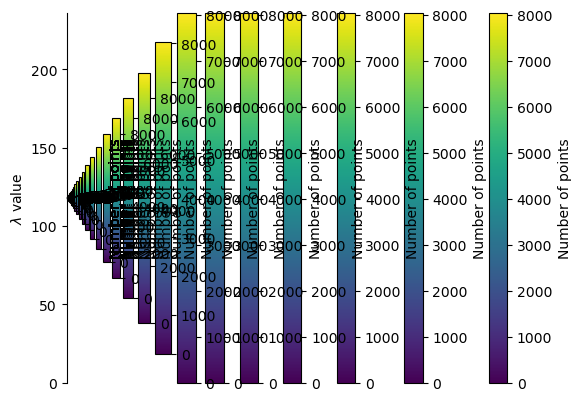

In [6]:
import cluster_data_mag
from cluster_data_mag import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from HDBSCAN import hdbscan_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_mag import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_mag.generate_running_year_ranges(2002, 2023, 4)
year_range = running_ranges

binned_data = cluster_data_mag.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

images_dir = "Images"
os.makedirs(images_dir, exist_ok=True)
plot_dir = os.path.join("Images", "hdbscan_simulations_running_bins_mag")
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning HDBSCAN for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.mag]).T
    feature_names = ["inclination [°]", "RAAN [°]", "Magnitude [mag]"]
    normalized_data, data_min, data_max = normalize_data(data_array)

    min_cluster_size_values = [10, 15]  
    min_samples_values = [None, 10] 
    cluster_selection_epsilon_values = [0.0, 0.1] 

    results = []

    for min_cluster_size in min_cluster_size_values: 
        for min_samples in min_samples_values:
            for cluster_selection_epsilon in cluster_selection_epsilon_values:

                result_hdbscan, time_hdbscan, n_clusters_hdbscan, points_per_cluster_hdbscan, metrics_hdbscan = run_clustering(
                    hdbscan_clustering, "HDBSCAN", normalized_data, data_min, data_max, min_cluster_size, min_samples, cluster_selection_epsilon, plot_condensed_tree=True, plot=False
                )

                unnormalized_data, cluster_centers = unnormalize(
                    result_hdbscan.data, result_hdbscan.cluster_centers, data_min, data_max
                )
                plotter = ClusterPlotter(unnormalized_data, result_hdbscan.labels, cluster_centers)
                plot_filename = os.path.join(plot_dir, f"hdbscan_{year_range}_minclust{min_cluster_size}_minsamples{min_samples}_epsilon{cluster_selection_epsilon}.png")
                title = f"HDBSCAN: years = {year_range}, min_cluster_size: {min_cluster_size}, min_samples: {min_samples}, epsilon: {cluster_selection_epsilon},"
                plotter.clusters_3d_plot(title, plot_filename, feature_names=feature_names, reverse_third_axis=True)

                rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_hdbscan[4].items()}

                results.append({
                    "Year Range": year_range,
                    "k": n_clusters_hdbscan,
                    "Runtime (s)": f"{time_hdbscan:.3f}",
                    "Clusters": n_clusters_hdbscan,
                    "Points per Cluster": points_per_cluster_hdbscan,
                    "Davies-Bouldin": f"{metrics_hdbscan[0]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[0], (int, float)) else None,
                    "Calinski-Harabasz": f"{metrics_hdbscan[1]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[1], (int, float)) else None,
                    "Dunn Index": f"{metrics_hdbscan[2]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[2], (int, float)) else None,
                    "Silhouette Score": f"{metrics_hdbscan[3]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[3], (int, float)) else None,
                    "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
                })

    df = pd.DataFrame(results)
    display(df)

# DENCLUE

In [7]:
import cluster_data_mag
from cluster_data_mag import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from clustering_utils_mag import ClusteringResult
from scipy.spatial.distance import cdist
from DENCLUE import denclue_clustering  # Import DENCLUE clustering function
from cluster_plotter import ClusterPlotter

# Same setup as before
standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data.generate_running_year_ranges(2002, 2023, 4)
year_range = standard_year_ranges

binned_data = cluster_data.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

plot_dir = "Images/denclue_simulations_normal_bins_mag"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning DENCLUE for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.mag]).T
    feature_names = ["inclination [°]", "RAAN [°]", "Magnitude [mag]"]
    normalized_data, data_min, data_max = normalize_data(data_array)

    epsilon_vals = [1000, 1000, 1500]
    max_iter_vals = [5000, 7000, 9000]
    bandwidth_vals = [0.01, 0.02, 0.03]

    results = []

    for epsilon in epsilon_vals:
        for max_iter in max_iter_vals:
            for bandwidth in bandwidth_vals:
                result_denclue, time_denclue, n_clusters_denclue, points_per_cluster_denclue, metrics_denclue = run_clustering(denclue_clustering, "DENCLUE",
                    normalized_data, data_min, data_max, epsilon=epsilon, max_iter=max_iter, bandwidth=bandwidth, plot = False
                )

                unnormalized_data, cluster_centers = unnormalize(
                    result_denclue.data, result_denclue.cluster_centers, data_min, data_max
                )
                plotter = ClusterPlotter(unnormalized_data, result_denclue.labels, cluster_centers)
                plot_filename = os.path.join(plot_dir, f"denclue_{year_range}_eps{epsilon}_maxiter{max_iter}_bandwidth{bandwidth}.png")
                title = f"DENCLUE: years = {year_range}, epsilon: {epsilon}, max_iter: {max_iter}, bandwidth: {bandwidth}"
                plotter.clusters_3d_plot(title, plot_filename, feature_names= feature_names, reverse_third_axis=True)
                
                results.append({
                    "Year Range": year_range,
                    "k": n_clusters_denclue,
                    "Runtime (s)": f"{time_denclue:.3f}",
                    "Clusters": n_clusters_denclue,
                    "Points per Cluster": points_per_cluster_denclue,
                    "Davies-Bouldin": f"{metrics_denclue[0]:.3f}" if metrics_denclue and isinstance(metrics_denclue[0], (int, float)) else None,
                    "Calinski-Harabasz": f"{metrics_denclue[1]:.3f}" if metrics_denclue and isinstance(metrics_denclue[1], (int, float)) else None,
                    "Dunn Index": f"{metrics_denclue[2]:.3f}" if metrics_denclue and isinstance(metrics_denclue[2], (int, float)) else None,
                    "Silhouette Score": f"{metrics_denclue[3]:.3f}" if metrics_denclue and isinstance(metrics_denclue[3], (int, float)) else None,
                    "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
                })

    df = pd.DataFrame(results)
    display(df)

AttributeError: 'ClusterData' object has no attribute 'generate_running_year_ranges'